# P2 : Concevoir une application au service de la santé publique - Analyse des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter as count
import scipy.stats as st
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from functions import *
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Importation des données

In [2]:
data_nett = pd.read_csv('data_nett.csv')

In [52]:
data_nett.shape

(320638, 23)

<div class="alert alert-block alert-info">
Le jeux de données se compose de 320638 lignes et de 23 colonnes, ce qui correspond bien aux dimensions du dataframe nettoyé obtenu à la fin du Notebook de nettoyage.
</div>

In [53]:
data_nett.head()

additives_n  ingredients_from_palm_oil_n  energy_100g   fat_100g  \
0     1.935953                     0.019666  1129.497821  12.725386   
1     0.000000                     0.000000  2243.000000  28.570000   
2     0.000000                     0.000000  1941.000000  17.860000   
3     0.000000                     0.000000  2540.000000  57.140000   
4     0.000000                     0.000000  1552.000000   1.430000   

   saturated-fat_100g  trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
0            5.125686        0.067193          0.020077           32.055657   
1           28.570000        0.000000          0.018000           64.290000   
2            0.000000        0.000000          0.000000           60.710000   
3            5.360000        0.000000          0.000000           17.860000   
4            2.100000        0.000000          0.000000           77.140000   

   sugars_100g  fiber_100g  ...  vitamin-a_100g  vitamin-c_100g  calcium_100g  \
0    15.985992    2.832163  ...         0.00016        0.014568      0.102042   
1    14.290000    3.600000  ...         0.00000        0.021400      0.000000   
2    17.860000    7.100000  ...         0.00000        0.000000      0.071000   
3     3.570000    7.100000  ...         0.00013        0.017000      0.143000   
4     0.180000    5.700000  ...         0.00013        0.017000      0.006000   

   iron_100g  nutrition-score-fr_100g  empreinte_carbone  pnns_groups_1  \
0   0.002962                 9.165365           7.093892            NaN   
1   0.001290                14.000000           1.600000            NaN   
2   0.001290                 0.000000           1.600000            NaN   
3   0.005140                12.000000           1.600000            NaN   
4   0.007000                 0.000000           6.300000            NaN   

   nutrition_grade_fr  nutrition_grade carbone_grade  
0                 NaN                c            C3  
1                   d                d            C1  
2                   b                b            C1  
3                   d                d            C1  
4                 NaN                b            C3  

[5 rows x 23 columns]

In [54]:
data_nett.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  320638 non-null  float64
 1   ingredients_from_palm_oil_n  320638 non-null  float64
 2   energy_100g                  320638 non-null  float64
 3   fat_100g                     320638 non-null  float64
 4   saturated-fat_100g           320638 non-null  float64
 5   trans-fat_100g               320638 non-null  float64
 6   cholesterol_100g             320638 non-null  float64
 7   carbohydrates_100g           320638 non-null  float64
 8   sugars_100g                  320638 non-null  float64
 9   fiber_100g                   320638 non-null  float64
 10  proteins_100g                320638 non-null  float64
 11  salt_100g                    320638 non-null  float64
 12  sodium_100g                  320638 non-null  float64
 13 

In [55]:
data_nett.isna().mean()

additives_n                    0.000000
ingredients_from_palm_oil_n    0.000000
energy_100g                    0.000000
fat_100g                       0.000000
saturated-fat_100g             0.000000
trans-fat_100g                 0.000000
cholesterol_100g               0.000000
carbohydrates_100g             0.000000
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
sodium_100g                    0.000000
vitamin-a_100g                 0.000000
vitamin-c_100g                 0.000000
calcium_100g                   0.000000
iron_100g                      0.000000
nutrition-score-fr_100g        0.000000
empreinte_carbone              0.000000
pnns_groups_1                  0.714778
nutrition_grade_fr             0.310391
nutrition_grade                0.000000
carbone_grade                  0.000000
dtype: float64

 <div class="alert alert-block alert-info">
Seules 2 variables ne sont pas imputées :<br/>
 - 'pnns_groups_1', qui correspond à la catégorie de produit et qui ne sera pas imputée ici au risque de créer de la fausse information.<br/>
 - 'nutrition_grade_fr', qui correspond au Nutri-score non imputée. Cette variable peut être supprimées car sa version imputée par KNNimputer est 'nutrition_grade '.
</div> 

In [56]:
print(data_nett.shape)
data_nett = data_nett.drop(['nutrition_grade_fr'], axis=1)
print(data_nett.shape)

(320638, 23)
(320638, 22)


In [57]:
data_nett.describe()

additives_n  ingredients_from_palm_oil_n    energy_100g  \
count  320638.000000                320638.000000  320638.000000   
mean        1.949150                     0.018080    1167.974746   
std         2.398557                     0.125467    1134.467107   
min         0.000000                     0.000000       0.000000   
25%         0.000000                     0.000000     476.000000   
50%         1.000000                     0.000000    1129.497821   
75%         3.000000                     0.000000    1661.000000   
max        31.000000                     2.000000  231199.000000   

            fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count  320638.000000       320638.000000   320638.000000     320638.000000   
mean       13.161275            5.327954        0.152334          0.015708   
std        16.316780            8.018186        1.495946          0.244566   
min         0.000000            0.000000        0.000000          0.000000   
25%         0.400000            0.000000        0.000000          0.000000   
50%         9.860000            2.500000        0.000000          0.000000   
75%        19.050000            6.087500        0.000000          0.020077   
max       100.000000          100.000000      100.000000         95.238000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       320638.000000  320638.000000  320638.000000  320638.000000   
mean            32.799354      15.816072       2.650886       7.108403   
std             27.201137      19.646652       4.716724       7.716258   
min              0.000000       0.000000       0.000000       0.000000   
25%              7.610000       1.700000       0.000000       1.400000   
50%             32.055657       9.680000       1.600000       6.000000   
75%             57.140000      18.000000       3.100000       8.890000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  vitamin-a_100g  vitamin-c_100g  \
count  320638.000000  320638.000000   320638.000000   320638.000000   
mean        2.198025       0.974966        0.000273        3.095249   
std         9.818014       4.440750        0.001640       15.778886   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.071120       0.030000        0.000000        0.000000   
50%         0.750000       0.298000        0.000072        0.005200   
75%         1.588307       0.647077        0.000160        0.021400   
max       100.000000     100.000000        0.120000      100.000000   

        calcium_100g      iron_100g  nutrition-score-fr_100g  \
count  320638.000000  320638.000000            320638.000000   
mean        0.350529       0.002562                 8.280845   
std         1.756596       0.079149                 8.301014   
min         0.000000       0.000000               -15.000000   
25%         0.000200       0.000005                 0.000000   
50%         0.037000       0.000900                 9.165365   
75%         0.102042       0.002962                14.000000   
max        99.006000      25.000000                40.000000   

       empreinte_carbone  
count      320638.000000  
mean            7.048634  
std             5.189959  
min             0.800000  
25%             1.600000  
50%             6.300000  
75%             7.600000  
max            17.500000

## Analyse univariée des variables catégorielles

In [58]:
#Sous-échantillon pour les analyses implicant la variable 'pnns_groups_1' :
print(data_nett.shape)
print(data_nett['pnns_groups_1'].isna().sum())
data_grp = data_nett.dropna(subset=['pnns_groups_1'])
print(data_grp.shape)

(320638, 22)
229185
(91453, 22)


In [59]:
data_grp.isna().mean()

additives_n                    0.0
ingredients_from_palm_oil_n    0.0
energy_100g                    0.0
fat_100g                       0.0
saturated-fat_100g             0.0
trans-fat_100g                 0.0
cholesterol_100g               0.0
carbohydrates_100g             0.0
sugars_100g                    0.0
fiber_100g                     0.0
proteins_100g                  0.0
salt_100g                      0.0
sodium_100g                    0.0
vitamin-a_100g                 0.0
vitamin-c_100g                 0.0
calcium_100g                   0.0
iron_100g                      0.0
nutrition-score-fr_100g        0.0
empreinte_carbone              0.0
pnns_groups_1                  0.0
nutrition_grade                0.0
carbone_grade                  0.0
dtype: float64

In [60]:
data_grp.describe()

additives_n  ingredients_from_palm_oil_n    energy_100g      fat_100g  \
count  91453.000000                 91453.000000   91453.000000  91453.000000   
mean       1.851827                     0.035532    1203.499402     13.980269   
std        2.298666                     0.174963    1546.343193     15.101904   
min        0.000000                     0.000000       0.000000      0.000000   
25%        0.000000                     0.000000     624.000000      2.000000   
50%        1.935953                     0.000000    1129.497821     12.725386   
75%        2.000000                     0.019666    1633.000000     19.000000   
max       31.000000                     2.000000  231199.000000    100.000000   

       saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count        91453.000000    91453.000000      91453.000000   
mean             6.477861        0.252807          0.014423   
std              8.685956        1.938981          0.077253   
min              0.000000        0.000000          0.000000   
25%              0.600000        0.000000          0.000000   
50%              5.000000        0.000000          0.000000   
75%              6.200000        0.067193          0.020077   
max            100.000000       56.000000         10.900000   

       carbohydrates_100g   sugars_100g    fiber_100g  proteins_100g  \
count        91453.000000  91453.000000  91453.000000   91453.000000   
mean            31.470861     14.446151      2.826233       7.496465   
std             24.644274     16.684668      4.971524       7.036309   
min              0.000000      0.000000      0.000000       0.000000   
25%              9.000000      2.000000      0.100000       3.500000   
50%             32.055657     14.000000      2.500000       7.080112   
75%             52.800000     15.985992      2.900000       8.300000   
max            100.000000    100.000000    100.000000     100.000000   

          salt_100g   sodium_100g  vitamin-a_100g  vitamin-c_100g  \
count  91453.000000  91453.000000    91453.000000    91453.000000   
mean       2.445937      1.122472        0.000348        5.158998   
std       11.446365      5.202350        0.002042       19.942279   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.090000      0.039370        0.000000        0.005000   
50%        0.900000      0.354331        0.000130        0.014568   
75%        1.588307      0.647077        0.000160        0.078900   
max      100.000000     58.000000        0.120000      100.000000   

       calcium_100g     iron_100g  nutrition-score-fr_100g  empreinte_carbone  
count  91453.000000  91453.000000             91453.000000       91453.000000  
mean       0.479240      0.002711                 8.534824           6.921027  
std        2.081541      0.055817                 7.660813           4.466395  
min        0.000000      0.000000               -14.000000           0.800000  
25%        0.006000      0.000010                 2.000000           3.000000  
50%        0.054800      0.001040                 9.165365           7.093892  
75%        0.102042      0.002962                14.000000           7.600000  
max       69.500000      8.928570                37.000000          17.500000

In [61]:
data_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91453 entries, 46 to 320637
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   additives_n                  91453 non-null  float64
 1   ingredients_from_palm_oil_n  91453 non-null  float64
 2   energy_100g                  91453 non-null  float64
 3   fat_100g                     91453 non-null  float64
 4   saturated-fat_100g           91453 non-null  float64
 5   trans-fat_100g               91453 non-null  float64
 6   cholesterol_100g             91453 non-null  float64
 7   carbohydrates_100g           91453 non-null  float64
 8   sugars_100g                  91453 non-null  float64
 9   fiber_100g                   91453 non-null  float64
 10  proteins_100g                91453 non-null  float64
 11  salt_100g                    91453 non-null  float64
 12  sodium_100g                  91453 non-null  float64
 13  vitamin-a_100g

<div class="alert alert-block alert-info">
Le sous-échantillon correspond bien à l'attendu. Il se compose de 91453 lignes et de 22 descripteurs.
</div>

C:\Users\n_a_e\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='nutrition_grade'>

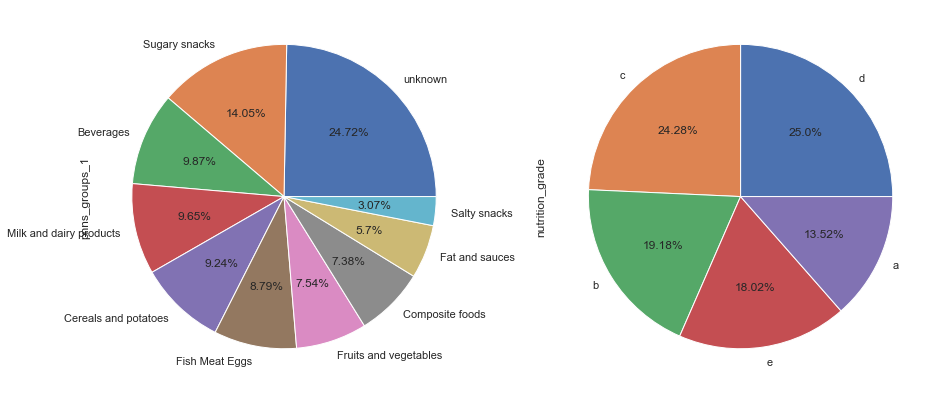

In [62]:
#"pnns_groups_1" et "new_grade"

fig = plt.figure(figsize = (15,10))

plt.subplot(1, 2, 1)
data_grp["pnns_groups_1"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

plt.subplot(1, 2, 2)
data_nett["nutrition_grade"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [63]:
effectifs = data_grp["pnns_groups_1"].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ["pnns_groups_1"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data_grp)
tab = tab.sort_values("pnns_groups_1")
tab["F"] = tab["f"].cumsum()

print(tab)

             pnns_groups_1      n         f         F
2                Beverages   9026  0.098696  0.098696
4     Cereals and potatoes   8452  0.092419  0.191115
7          Composite foods   6746  0.073765  0.264879
8           Fat and sauces   5210  0.056969  0.321848
5           Fish Meat Eggs   8036  0.087870  0.409719
6    Fruits and vegetables   6894  0.075383  0.485102
3  Milk and dairy products   8825  0.096498  0.581599
9             Salty snacks   2806  0.030682  0.612282
1            Sugary snacks  12852  0.140531  0.752813
0                  unknown  22606  0.247187  1.000000


In [64]:
data_grp['pnns_groups_1'].describe()

count       91453
unique         10
top       unknown
freq        22606
Name: pnns_groups_1, dtype: object

<div class="alert alert-block alert-info">
la majorité des produits (près de 25%) sont des produits dont la catégorie n'est pas inconnue. Viennent ensuite la classe des snacks sucrés à hauteur de 14%. 4 catégories sont autour des 9% : les boissons, les produits laitiers, les céréales et pommes de terre, et les viandes et poissons.
Le jeux de données est assez diversifié pour couvrir toutes les catégories de produits alimentaires.
</div>

In [65]:
effectifs = data_nett["nutrition_grade"].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ["nutrition_grade"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data_nett)
tab = tab.sort_values("nutrition_grade")
tab["F"] = tab["f"].cumsum()

print(tab)

  nutrition_grade      n         f         F
4               a  43363  0.135240  0.135240
2               b  61484  0.191755  0.326995
1               c  77850  0.242797  0.569792
0               d  80156  0.249989  0.819781
3               e  57785  0.180219  1.000000


In [66]:
data_nett['nutrition_grade'].describe()

count     320638
unique         5
top            d
freq       80156
Name: nutrition_grade, dtype: object

<div class="alert alert-block alert-info">
Près de la moitié des produits du jeux de données ont un Nutri-score C ou D. Avec près de 14%, Le Nutriscore A est le moins bien représenté, ce qui est cohérent avec le profil en type de produit du data-set, avec une dominance de produits sucrés (snacks et boissons), et peu de fruits et légumes. Néanmoins chaque Nutri-score est suffisamment représenté pour que l'analyse soit pertinente.
</div>

<AxesSubplot:xlabel='ingredients_from_palm_oil_n'>

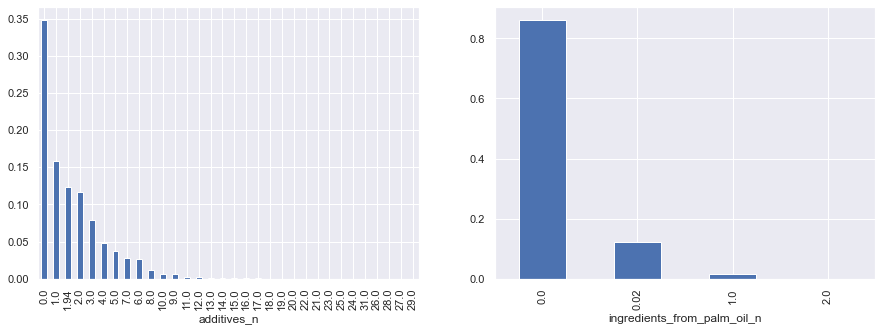

In [67]:
#"additives_n" et "ingredients_from_palm_oil_n"

fig = plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
round(data_nett["additives_n"],2).value_counts(normalize=True).plot(
    kind='bar', xlabel='additives_n')

plt.subplot(1, 2, 2)
round(data_nett["ingredients_from_palm_oil_n"],2).value_counts(normalize=True).plot(
    kind='bar', xlabel='ingredients_from_palm_oil_n')

In [68]:
effectifs = data_nett["additives_n"].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ["additives_n"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data_nett)
tab = tab.sort_values("additives_n")
tab["F"] = tab["f"].cumsum()

print(tab)

    additives_n       n         f         F
0      0.000000  111639  0.348178  0.348178
1      1.000000   50593  0.157789  0.505966
2      1.935953   39571  0.123413  0.629380
3      2.000000   37429  0.116733  0.746112
4      3.000000   25547  0.079676  0.825788
5      4.000000   15392  0.048004  0.873792
6      5.000000   11968  0.037326  0.911118
8      6.000000    8469  0.026413  0.937531
7      7.000000    8806  0.027464  0.964995
9      8.000000    3814  0.011895  0.976890
11     9.000000    2225  0.006939  0.983829
10    10.000000    2260  0.007048  0.990878
12    11.000000     895  0.002791  0.993669
13    12.000000     591  0.001843  0.995512
14    13.000000     376  0.001173  0.996685
15    14.000000     328  0.001023  0.997708
16    15.000000     224  0.000699  0.998406
17    16.000000     131  0.000409  0.998815
18    17.000000     112  0.000349  0.999164
19    18.000000      68  0.000212  0.999376
20    19.000000      55  0.000172  0.999548
21    20.000000      48  0.00015

In [69]:
data_nett['additives_n'].describe()

count    320638.000000
mean          1.949150
std           2.398557
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64

<div class="alert alert-block alert-info">
35% des produits ne contiennent pas d'additif, 50% en ont 1 ou moins, et près de 95% en ont 7 ou moins. Malgrè une étendue qui va jusqu'à 31 additifs, l'ensemble des produits contenant plus de 10 additifs représentent moins de 1% du jeux de données.
Compte tenue de la disperssion, 'additives_n' est une variable qu'il faudra discrétiser pour faciliter les analyses.
</div>

In [70]:
effectifs = data_nett["ingredients_from_palm_oil_n"].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ["ingredients_from_palm_oil_n"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data_nett)
tab = tab.sort_values("ingredients_from_palm_oil_n")
tab["F"] = tab["f"].cumsum()

print(tab)

   ingredients_from_palm_oil_n       n         f         F
0                     0.000000  276107  0.861118  0.861118
1                     0.019666   39571  0.123413  0.984531
2                     1.000000    4901  0.015285  0.999816
3                     2.000000      59  0.000184  1.000000


In [71]:
data_nett['ingredients_from_palm_oil_n'].describe()

count    320638.000000
mean          0.018080
std           0.125467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

<div class="alert alert-block alert-info">
La majorité des produits n'ont pas d'ingrédients issus de l'huile de palme. Seulement 2% ont plus d'un ingrédient dérivé de l'huile de palme.
</div>

<AxesSubplot:ylabel='carbone_grade'>

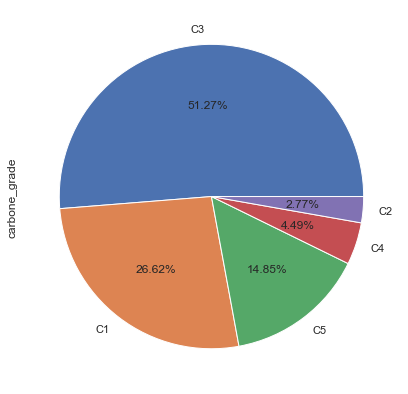

In [72]:
# "carbone_grade"

fig = plt.figure(figsize = (7,7))

data_nett["carbone_grade"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [73]:
effectifs = data_nett["carbone_grade"].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ["carbone_grade"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data_nett)
tab = tab.sort_values("carbone_grade")
tab["F"] = tab["f"].cumsum()

print(tab)

  carbone_grade       n         f         F
1            C1   85366  0.266238  0.266238
4            C2    8886  0.027713  0.293951
0            C3  164400  0.512728  0.806679
3            C4   14382  0.044854  0.851534
2            C5   47604  0.148466  1.000000


In [74]:
data_nett["carbone_grade"].describe()

count     320638
unique         5
top           C3
freq      164400
Name: carbone_grade, dtype: object

<div class="alert alert-block alert-info">
Plus de 50% des produits ont un carbonne-score de C3. Les carbonne-scores les plus présents sont les 2 catégories extrêmes C2 et  C5 avec respectivement 25% et 15% des produits.
</div>

## Analyse univariée des variables continues

### Analyse graphique

<AxesSubplot:xlabel='trans-fat_100g', ylabel='Count'>

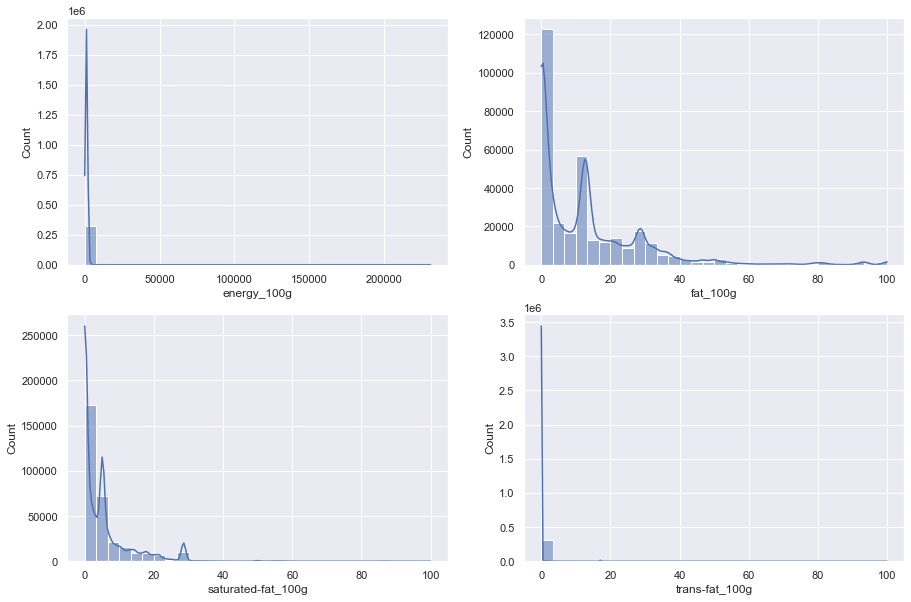

In [75]:
#"energy_100g", "fat_100g", "saturated-fat_100g", "trans-fat_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett["energy_100g"],bins=30, kde='True', ax=ax1)
sns.histplot(data_nett["fat_100g"], bins=30, kde='True', ax=ax2)
sns.histplot(data_nett["saturated-fat_100g"], bins=30, kde='True', ax=ax3)
sns.histplot(data_nett["trans-fat_100g"], bins=30, kde='True', ax=ax4)

(0.0, 10000.0)

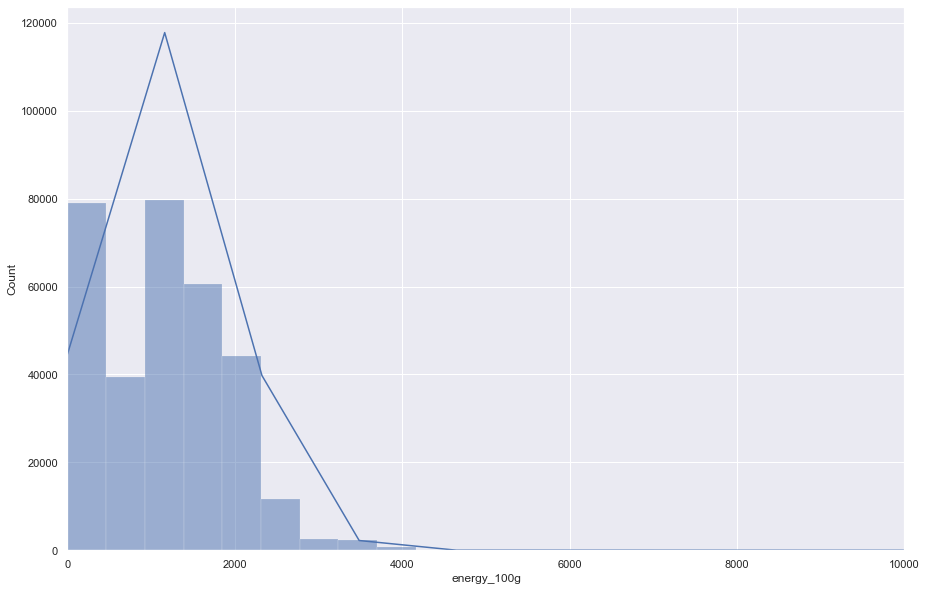

In [76]:
#Zoom pour "energy_100g"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(8,5)})
sns.histplot(data_nett["energy_100g"],bins=500, kde='True')

ax.set_xlim(0, 10000)

(0.0, 0.8)

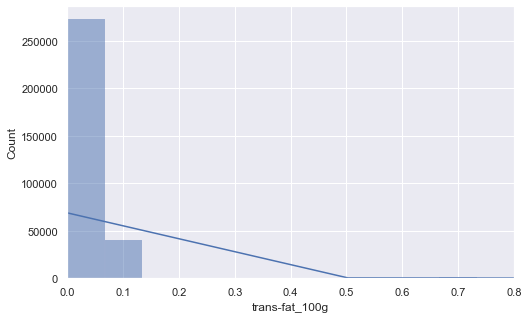

In [77]:
#Zoom pour "trans-fat_100g"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(4,8)})
sns.histplot(data_nett["trans-fat_100g"],bins=1500, kde='True')

ax.set_xlim(0,0.8)

In [78]:
data_nett.describe()

additives_n  ingredients_from_palm_oil_n    energy_100g  \
count  320638.000000                320638.000000  320638.000000   
mean        1.949150                     0.018080    1167.974746   
std         2.398557                     0.125467    1134.467107   
min         0.000000                     0.000000       0.000000   
25%         0.000000                     0.000000     476.000000   
50%         1.000000                     0.000000    1129.497821   
75%         3.000000                     0.000000    1661.000000   
max        31.000000                     2.000000  231199.000000   

            fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count  320638.000000       320638.000000   320638.000000     320638.000000   
mean       13.161275            5.327954        0.152334          0.015708   
std        16.316780            8.018186        1.495946          0.244566   
min         0.000000            0.000000        0.000000          0.000000   
25%         0.400000            0.000000        0.000000          0.000000   
50%         9.860000            2.500000        0.000000          0.000000   
75%        19.050000            6.087500        0.000000          0.020077   
max       100.000000          100.000000      100.000000         95.238000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       320638.000000  320638.000000  320638.000000  320638.000000   
mean            32.799354      15.816072       2.650886       7.108403   
std             27.201137      19.646652       4.716724       7.716258   
min              0.000000       0.000000       0.000000       0.000000   
25%              7.610000       1.700000       0.000000       1.400000   
50%             32.055657       9.680000       1.600000       6.000000   
75%             57.140000      18.000000       3.100000       8.890000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  vitamin-a_100g  vitamin-c_100g  \
count  320638.000000  320638.000000   320638.000000   320638.000000   
mean        2.198025       0.974966        0.000273        3.095249   
std         9.818014       4.440750        0.001640       15.778886   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.071120       0.030000        0.000000        0.000000   
50%         0.750000       0.298000        0.000072        0.005200   
75%         1.588307       0.647077        0.000160        0.021400   
max       100.000000     100.000000        0.120000      100.000000   

        calcium_100g      iron_100g  nutrition-score-fr_100g  \
count  320638.000000  320638.000000            320638.000000   
mean        0.350529       0.002562                 8.280845   
std         1.756596       0.079149                 8.301014   
min         0.000000       0.000000               -15.000000   
25%         0.000200       0.000005                 0.000000   
50%         0.037000       0.000900                 9.165365   
75%         0.102042       0.002962                14.000000   
max        99.006000      25.000000                40.000000   

       empreinte_carbone  
count      320638.000000  
mean            7.048634  
std             5.189959  
min             0.800000  
25%             1.600000  
50%             6.300000  
75%             7.600000  
max            17.500000

<div class="alert alert-block alert-info">
75% des produits ont un "saturated-fat_100g" infèrieur à 6.g/100g. Cette valeur du 3ème quartile augmente à 19g/100g pour le taux de "fat_100g". Les taux de 'trans_fat_100g' sont très faibles. L'énergie moyenne est à 1167kj/100G, ce qui est proche de la limite au 3ème quartile (1661kj/100g).
</div>

(0.0, 1.0)

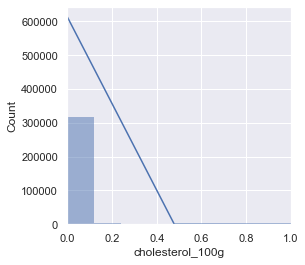

In [79]:
#Zooms "cholesterol_100g":
sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["cholesterol_100g"], bins=800, kde='True')
ax.set_xlim(0, 1)

(0.0, 20.0)

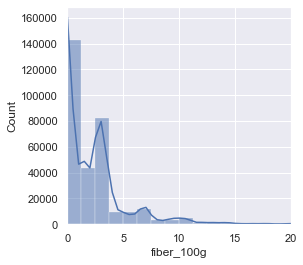

In [80]:
#Zooms "fiber_100g":
sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["fiber_100g"], bins=80, kde='True')
ax.set_xlim(0, 20)

In [81]:
data_nett.describe()

additives_n  ingredients_from_palm_oil_n    energy_100g  \
count  320638.000000                320638.000000  320638.000000   
mean        1.949150                     0.018080    1167.974746   
std         2.398557                     0.125467    1134.467107   
min         0.000000                     0.000000       0.000000   
25%         0.000000                     0.000000     476.000000   
50%         1.000000                     0.000000    1129.497821   
75%         3.000000                     0.000000    1661.000000   
max        31.000000                     2.000000  231199.000000   

            fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count  320638.000000       320638.000000   320638.000000     320638.000000   
mean       13.161275            5.327954        0.152334          0.015708   
std        16.316780            8.018186        1.495946          0.244566   
min         0.000000            0.000000        0.000000          0.000000   
25%         0.400000            0.000000        0.000000          0.000000   
50%         9.860000            2.500000        0.000000          0.000000   
75%        19.050000            6.087500        0.000000          0.020077   
max       100.000000          100.000000      100.000000         95.238000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       320638.000000  320638.000000  320638.000000  320638.000000   
mean            32.799354      15.816072       2.650886       7.108403   
std             27.201137      19.646652       4.716724       7.716258   
min              0.000000       0.000000       0.000000       0.000000   
25%              7.610000       1.700000       0.000000       1.400000   
50%             32.055657       9.680000       1.600000       6.000000   
75%             57.140000      18.000000       3.100000       8.890000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  vitamin-a_100g  vitamin-c_100g  \
count  320638.000000  320638.000000   320638.000000   320638.000000   
mean        2.198025       0.974966        0.000273        3.095249   
std         9.818014       4.440750        0.001640       15.778886   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.071120       0.030000        0.000000        0.000000   
50%         0.750000       0.298000        0.000072        0.005200   
75%         1.588307       0.647077        0.000160        0.021400   
max       100.000000     100.000000        0.120000      100.000000   

        calcium_100g      iron_100g  nutrition-score-fr_100g  \
count  320638.000000  320638.000000            320638.000000   
mean        0.350529       0.002562                 8.280845   
std         1.756596       0.079149                 8.301014   
min         0.000000       0.000000               -15.000000   
25%         0.000200       0.000005                 0.000000   
50%         0.037000       0.000900                 9.165365   
75%         0.102042       0.002962                14.000000   
max        99.006000      25.000000                40.000000   

       empreinte_carbone  
count      320638.000000  
mean            7.048634  
std             5.189959  
min             0.800000  
25%             1.600000  
50%             6.300000  
75%             7.600000  
max            17.500000

<div class="alert alert-block alert-info">
La plus-part des produits du jeux de données ont un taux de cholesterol très faible.
75% des produits ont un taux de sucre infèrieur à 18g/100g. Pour les carbohydrates ce taux passe à 57g/100g.
</div>

<AxesSubplot:xlabel='vitamin-a_100g', ylabel='Count'>

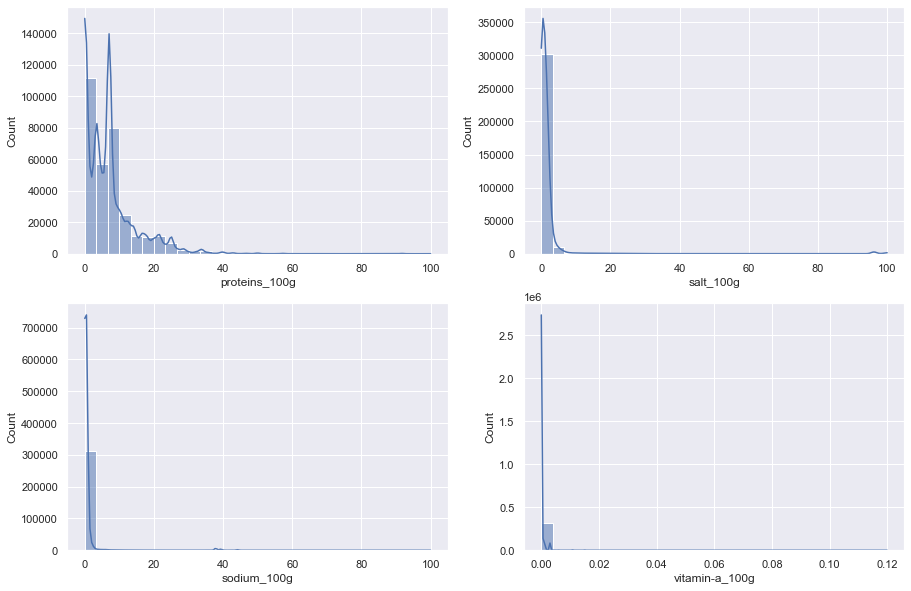

In [82]:
#"proteins_100g", "salt_100g", "sodium_100g", "vitamin-a_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett["proteins_100g"], bins=30, kde='True', ax=ax1)
sns.histplot(data_nett["salt_100g"], bins=30, kde='True', ax=ax2)
sns.histplot(data_nett["sodium_100g"], bins=30, kde='True', ax=ax3)
sns.histplot(data_nett["vitamin-a_100g"], bins=30, kde='True', ax=ax4)

(0.0, 5.0)

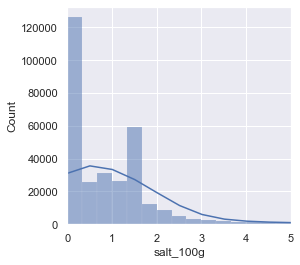

In [83]:
#Zoom "salt_100g"

sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["salt_100g"], bins=300, kde='True')
ax.set_xlim(0, 5)

(0.0, 5.0)

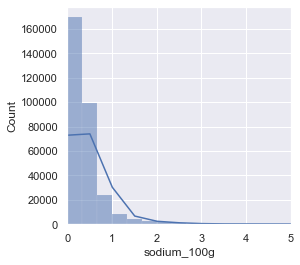

In [84]:
#Zoom "sodium_100g"

sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["sodium_100g"], bins=300, kde='True')
ax.set_xlim(0, 5)

(0.0, 0.005)

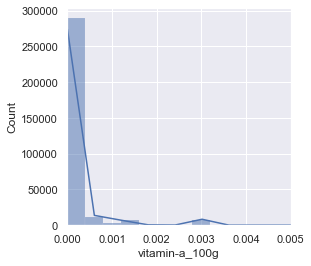

In [85]:
#Zoom "vitamin-a_100g"

sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["vitamin-a_100g"], bins=300, kde='True')
ax.set_xlim(0, 0.005)

In [86]:
data_nett.describe()

additives_n  ingredients_from_palm_oil_n    energy_100g  \
count  320638.000000                320638.000000  320638.000000   
mean        1.949150                     0.018080    1167.974746   
std         2.398557                     0.125467    1134.467107   
min         0.000000                     0.000000       0.000000   
25%         0.000000                     0.000000     476.000000   
50%         1.000000                     0.000000    1129.497821   
75%         3.000000                     0.000000    1661.000000   
max        31.000000                     2.000000  231199.000000   

            fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count  320638.000000       320638.000000   320638.000000     320638.000000   
mean       13.161275            5.327954        0.152334          0.015708   
std        16.316780            8.018186        1.495946          0.244566   
min         0.000000            0.000000        0.000000          0.000000   
25%         0.400000            0.000000        0.000000          0.000000   
50%         9.860000            2.500000        0.000000          0.000000   
75%        19.050000            6.087500        0.000000          0.020077   
max       100.000000          100.000000      100.000000         95.238000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       320638.000000  320638.000000  320638.000000  320638.000000   
mean            32.799354      15.816072       2.650886       7.108403   
std             27.201137      19.646652       4.716724       7.716258   
min              0.000000       0.000000       0.000000       0.000000   
25%              7.610000       1.700000       0.000000       1.400000   
50%             32.055657       9.680000       1.600000       6.000000   
75%             57.140000      18.000000       3.100000       8.890000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  vitamin-a_100g  vitamin-c_100g  \
count  320638.000000  320638.000000   320638.000000   320638.000000   
mean        2.198025       0.974966        0.000273        3.095249   
std         9.818014       4.440750        0.001640       15.778886   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.071120       0.030000        0.000000        0.000000   
50%         0.750000       0.298000        0.000072        0.005200   
75%         1.588307       0.647077        0.000160        0.021400   
max       100.000000     100.000000        0.120000      100.000000   

        calcium_100g      iron_100g  nutrition-score-fr_100g  \
count  320638.000000  320638.000000            320638.000000   
mean        0.350529       0.002562                 8.280845   
std         1.756596       0.079149                 8.301014   
min         0.000000       0.000000               -15.000000   
25%         0.000200       0.000005                 0.000000   
50%         0.037000       0.000900                 9.165365   
75%         0.102042       0.002962                14.000000   
max        99.006000      25.000000                40.000000   

       empreinte_carbone  
count      320638.000000  
mean            7.048634  
std             5.189959  
min             0.800000  
25%             1.600000  
50%             6.300000  
75%             7.600000  
max            17.500000

<div class="alert alert-block alert-info">
La plus-part des produits du jeux de données ont un taux de vitamine A très faible.
75% des produits ont un taux de protéine infèrieur à 8.9g g/100g.
</div>

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

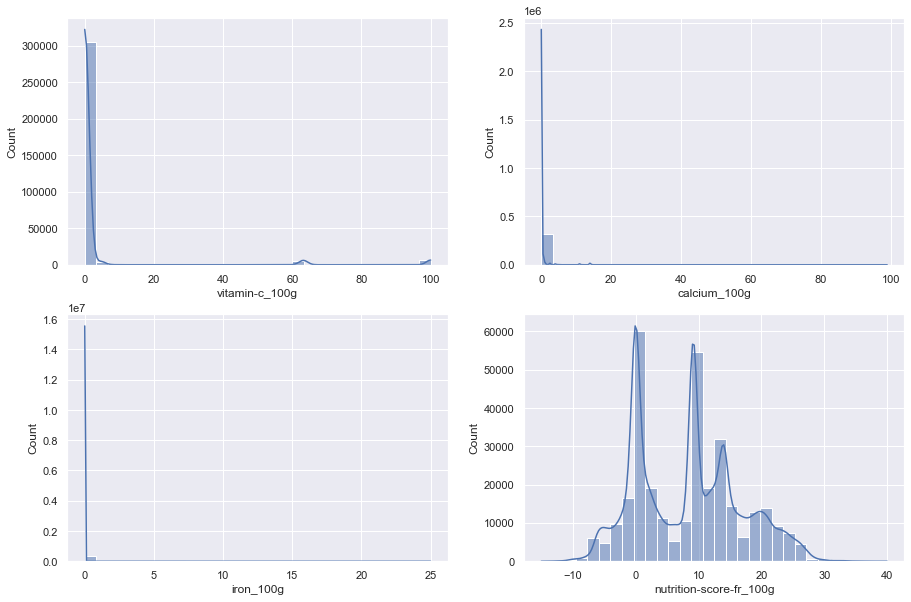

In [87]:
#"vitamin-c_100g", "calcium_100g", "iron_100g", "nutrition-score-fr_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett["vitamin-c_100g"], bins=30, kde='True', ax=ax1)
sns.histplot(data_nett["calcium_100g"], bins=30, kde='True', ax=ax2)
sns.histplot(data_nett["iron_100g"], bins=30, kde='True', ax=ax3)
sns.histplot(data_nett["nutrition-score-fr_100g"], bins=30, kde='True', ax=ax4)

(0.0, 5.0)

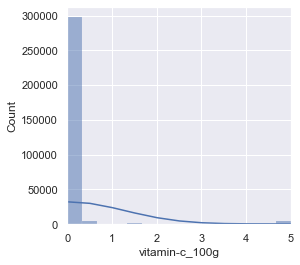

In [88]:
#Zoom "vitamin-c_100g"

sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["vitamin-c_100g"], bins=300, kde='True')
ax.set_xlim(0, 5)

(0.0, 5.0)

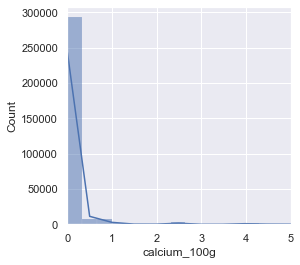

In [89]:
#Zoom "calcium_100g"

sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["calcium_100g"], bins=300, kde='True')
ax.set_xlim(0, 5)

(0.0, 0.2)

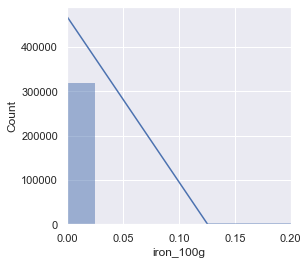

In [90]:
#Zoom "iron_100g"

sns.set(rc = {'figure.figsize':(4,4)})
fig, ax = plt.subplots()
sns.histplot(data_nett["iron_100g"], bins=1000, kde='True')
ax.set_xlim(0, 0.2)

In [91]:
data_nett.describe()

additives_n  ingredients_from_palm_oil_n    energy_100g  \
count  320638.000000                320638.000000  320638.000000   
mean        1.949150                     0.018080    1167.974746   
std         2.398557                     0.125467    1134.467107   
min         0.000000                     0.000000       0.000000   
25%         0.000000                     0.000000     476.000000   
50%         1.000000                     0.000000    1129.497821   
75%         3.000000                     0.000000    1661.000000   
max        31.000000                     2.000000  231199.000000   

            fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count  320638.000000       320638.000000   320638.000000     320638.000000   
mean       13.161275            5.327954        0.152334          0.015708   
std        16.316780            8.018186        1.495946          0.244566   
min         0.000000            0.000000        0.000000          0.000000   
25%         0.400000            0.000000        0.000000          0.000000   
50%         9.860000            2.500000        0.000000          0.000000   
75%        19.050000            6.087500        0.000000          0.020077   
max       100.000000          100.000000      100.000000         95.238000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       320638.000000  320638.000000  320638.000000  320638.000000   
mean            32.799354      15.816072       2.650886       7.108403   
std             27.201137      19.646652       4.716724       7.716258   
min              0.000000       0.000000       0.000000       0.000000   
25%              7.610000       1.700000       0.000000       1.400000   
50%             32.055657       9.680000       1.600000       6.000000   
75%             57.140000      18.000000       3.100000       8.890000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  vitamin-a_100g  vitamin-c_100g  \
count  320638.000000  320638.000000   320638.000000   320638.000000   
mean        2.198025       0.974966        0.000273        3.095249   
std         9.818014       4.440750        0.001640       15.778886   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.071120       0.030000        0.000000        0.000000   
50%         0.750000       0.298000        0.000072        0.005200   
75%         1.588307       0.647077        0.000160        0.021400   
max       100.000000     100.000000        0.120000      100.000000   

        calcium_100g      iron_100g  nutrition-score-fr_100g  \
count  320638.000000  320638.000000            320638.000000   
mean        0.350529       0.002562                 8.280845   
std         1.756596       0.079149                 8.301014   
min         0.000000       0.000000               -15.000000   
25%         0.000200       0.000005                 0.000000   
50%         0.037000       0.000900                 9.165365   
75%         0.102042       0.002962                14.000000   
max        99.006000      25.000000                40.000000   

       empreinte_carbone  
count      320638.000000  
mean            7.048634  
std             5.189959  
min             0.800000  
25%             1.600000  
50%             6.300000  
75%             7.600000  
max            17.500000

<div class="alert alert-block alert-info">
Les taux de vitamin c, de fer, et calcium sont très faibles. L'étendue du Nutri-score correpond à l'échelle connue (de -15 à 40), avec une valeur moyenne de 8.3, ce qui correspond à un Nutri grade de C.
</div>

<AxesSubplot:xlabel='empreinte_carbone', ylabel='Count'>

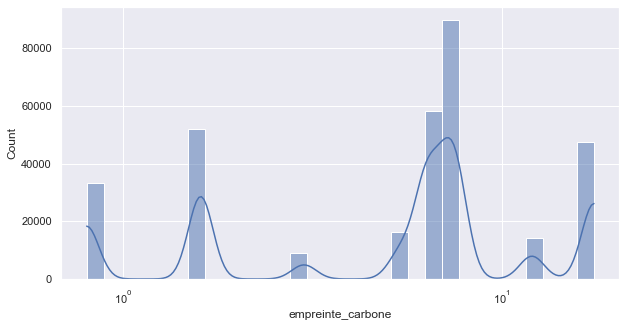

In [92]:
#"empreinte_carbone"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett["empreinte_carbone"],bins=30, kde='True', log_scale=True,)

In [93]:
data_nett["empreinte_carbone"].describe()

count    320638.000000
mean          7.048634
std           5.189959
min           0.800000
25%           1.600000
50%           6.300000
75%           7.600000
max          17.500000
Name: empreinte_carbone, dtype: float64

C:\Users\n_a_e\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='empreinte_carbone'>

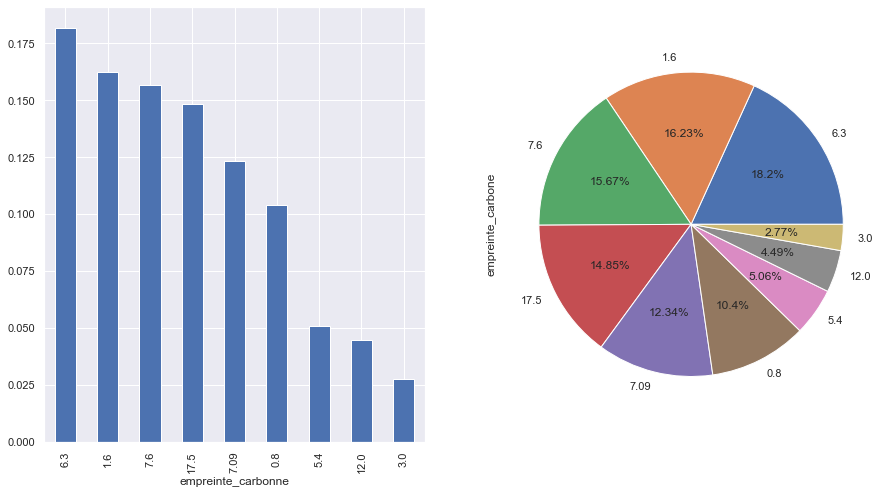

In [94]:
#"empreinte_carbone"

fig = plt.figure(figsize = (15,8))

plt.subplot(1, 2, 1)
round(data_nett["empreinte_carbone"],2).value_counts(normalize=True).plot(
    kind='bar', xlabel="empreinte_carbonne")

plt.subplot(1, 2, 2)
round(data_nett["empreinte_carbone"],2).value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

### Analyse de la tendance centrale et de la mesure de forme

In [4]:
print(data_nett.shape)
data_qtt = data_nett.drop(['additives_n', 'ingredients_from_palm_oil_n', 'pnns_groups_1', 'nutrition_grade', 'carbone_grade'],
                          axis=1 )
print(data_qtt.shape)

(320638, 23)
(320638, 18)


In [96]:
data_qtt.describe()

energy_100g       fat_100g  saturated-fat_100g  trans-fat_100g  \
count  320638.000000  320638.000000       320638.000000   320638.000000   
mean     1167.974746      13.161275            5.327954        0.152334   
std      1134.467107      16.316780            8.018186        1.495946   
min         0.000000       0.000000            0.000000        0.000000   
25%       476.000000       0.400000            0.000000        0.000000   
50%      1129.497821       9.860000            2.500000        0.000000   
75%      1661.000000      19.050000            6.087500        0.000000   
max    231199.000000     100.000000          100.000000      100.000000   

       cholesterol_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count     320638.000000       320638.000000  320638.000000  320638.000000   
mean           0.015708           32.799354      15.816072       2.650886   
std            0.244566           27.201137      19.646652       4.716724   
min            0.000000            0.000000       0.000000       0.000000   
25%            0.000000            7.610000       1.700000       0.000000   
50%            0.000000           32.055657       9.680000       1.600000   
75%            0.020077           57.140000      18.000000       3.100000   
max           95.238000          100.000000     100.000000     100.000000   

       proteins_100g      salt_100g    sodium_100g  vitamin-a_100g  \
count  320638.000000  320638.000000  320638.000000   320638.000000   
mean        7.108403       2.198025       0.974966        0.000273   
std         7.716258       9.818014       4.440750        0.001640   
min         0.000000       0.000000       0.000000        0.000000   
25%         1.400000       0.071120       0.030000        0.000000   
50%         6.000000       0.750000       0.298000        0.000072   
75%         8.890000       1.588307       0.647077        0.000160   
max       100.000000     100.000000     100.000000        0.120000   

       vitamin-c_100g   calcium_100g      iron_100g  nutrition-score-fr_100g  \
count   320638.000000  320638.000000  320638.000000            320638.000000   
mean         3.095249       0.350529       0.002562                 8.280845   
std         15.778886       1.756596       0.079149                 8.301014   
min          0.000000       0.000000       0.000000               -15.000000   
25%          0.000000       0.000200       0.000005                 0.000000   
50%          0.005200       0.037000       0.000900                 9.165365   
75%          0.021400       0.102042       0.002962                14.000000   
max        100.000000      99.006000      25.000000                40.000000   

       empreinte_carbone  
count      320638.000000  
mean            7.048634  
std             5.189959  
min             0.800000  
25%             1.600000  
50%             6.300000  
75%             7.600000  
max            17.500000

In [97]:
#Tendances centrales :

for variable in list(data_qtt.columns) :
    moyenne = round(data_qtt[variable].mean(),2)
    mediane = round(data_qtt[variable].median(),2)
    variance = round(data_qtt[variable].var(),2)
    ecartype = round(data_qtt[variable].std(),2)
    print('moyenne', variable, ':', moyenne)
    print('mediane', variable, ':', mediane)
    print('variance', variable, ':', variance)
    print('ecartype', variable, ':', ecartype)
    print('')

moyenne energy_100g : 1167.97
mediane energy_100g : 1129.5
variance energy_100g : 1287015.62
ecartype energy_100g : 1134.47

moyenne fat_100g : 13.16
mediane fat_100g : 9.86
variance fat_100g : 266.24
ecartype fat_100g : 16.32

moyenne saturated-fat_100g : 5.33
mediane saturated-fat_100g : 2.5
variance saturated-fat_100g : 64.29
ecartype saturated-fat_100g : 8.02

moyenne trans-fat_100g : 0.15
mediane trans-fat_100g : 0.0
variance trans-fat_100g : 2.24
ecartype trans-fat_100g : 1.5

moyenne cholesterol_100g : 0.02
mediane cholesterol_100g : 0.0
variance cholesterol_100g : 0.06
ecartype cholesterol_100g : 0.24

moyenne carbohydrates_100g : 32.8
mediane carbohydrates_100g : 32.06
variance carbohydrates_100g : 739.9
ecartype carbohydrates_100g : 27.2

moyenne sugars_100g : 15.82
mediane sugars_100g : 9.68
variance sugars_100g : 385.99
ecartype sugars_100g : 19.65

moyenne fiber_100g : 2.65
mediane fiber_100g : 1.6
variance fiber_100g : 22.25
ecartype fiber_100g : 4.72

moyenne proteins_10

<div class="alert alert-block alert-info">
Certaines variables comme "saturated-fat_100g" ont une moyenne fortement décallée de la médiane, ce qui traduit un déséquilibre  des données (vers les valeurs pus hautes pour "saturated-fat_100g").<br/>

D'autres comme "nutrition-score-fr_100g", "empreinte_carbone", "ou carbohydrates_100g", ont une moyenne proche de la médiane, ce qui correspond à une distribution plutôt homogène des données.
</div>

In [98]:
#Mesures de forme :

for variable in list(data_qtt.columns) :
    skewness = round(data_qtt[variable].skew(),2)
    kurtosis = round(data_qtt[variable].kurtosis(),2)
    print('skewness', variable, ':', skewness)
    print('kurtosis', variable, ':', kurtosis)
    print('')

skewness energy_100g : 97.58
kurtosis energy_100g : 18417.24

skewness fat_100g : 2.23
kurtosis fat_100g : 6.98

skewness saturated-fat_100g : 3.06
kurtosis saturated-fat_100g : 16.17

skewness trans-fat_100g : 14.07
kurtosis trans-fat_100g : 312.15

skewness cholesterol_100g : 313.26
kurtosis cholesterol_100g : 106690.49

skewness carbohydrates_100g : 0.53
kurtosis carbohydrates_100g : -0.9

skewness sugars_100g : 1.83
kurtosis sugars_100g : 3.24

skewness fiber_100g : 6.18
kurtosis fiber_100g : 63.97

skewness proteins_100g : 2.49
kurtosis proteins_100g : 12.54

skewness salt_100g : 8.69
kurtosis salt_100g : 77.99

skewness sodium_100g : 8.23
kurtosis sodium_100g : 71.01

skewness vitamin-a_100g : 36.84
kurtosis vitamin-a_100g : 1935.78

skewness vitamin-c_100g : 5.31
kurtosis vitamin-c_100g : 27.4

skewness calcium_100g : 8.37
kurtosis calcium_100g : 124.17

skewness iron_100g : 196.66
kurtosis iron_100g : 48241.28

skewness nutrition-score-fr_100g : 0.27
kurtosis nutrition-score-fr

<div class="alert alert-block alert-info">
Le skewness permet de mesurer l'asymétrie des données autour de la tendance centrale. Les valeurs prochent de 0 comme pour "empreinte_carbonne_100g", "nutrition-score-fr_100g" ou "carbohydrates_100g", traduisent une distribution symétrique, alors que les valeurs positives, comme pour "energy_100g" ou "cholesterol_100g", correspondent à une distribution étalée vers la gauche.<br/>

Le kurtosis mesure le degrès d'aplatissement des données. Lorsqu'il est proche de 0, comme pour "empreinte_carbonne_100g", "nutrition-score-fr_100g" ou "carbohydrates_100g", l'aplatissement se rapporche d'une Gaussienne, lorsqu'il est positif, comme pour "energy_100g" ou "cholesterol_100g", les données soont moins applaties que pour une distibution Gaussienne, les informations sont donc plus concentrées.
</div>

## Analyse bivariée 

### Entre variables quantitatives

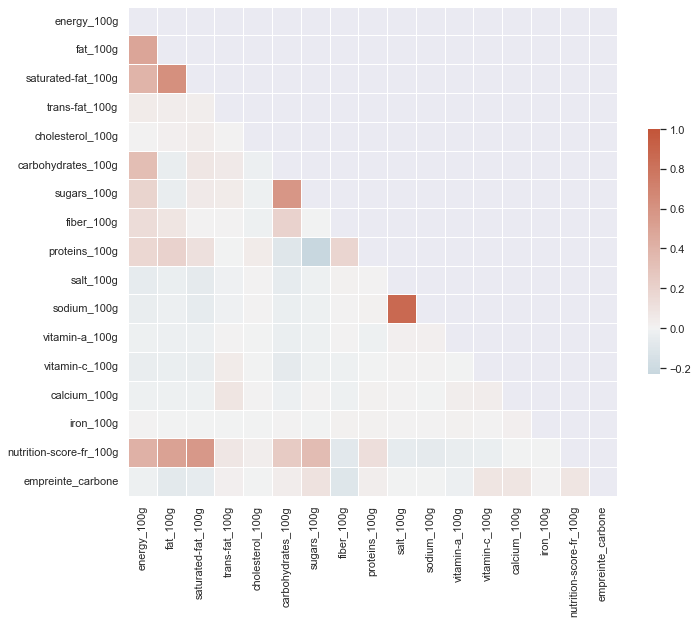

In [99]:
#Heatmap des corrélations pour les variables quantitatives :

corr = data_qtt.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<div class="alert alert-block alert-info"> L'empreinte carbonne ne semble pas être corrélée avec les autres variables, ce qui serait un argument supplémentaire pour mon projet d'application : ce serait une donnée indépendante des informations nutritionnelles, décorellée du Nutri-score, et qui apporterait donc un supplément d'information essentiel au consommateur.

In [6]:
print(data_qtt.shape)
data_qtt_corr = data_qtt.drop(['trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g', 'vitamin-c_100g',
                               'iron_100g', 'calcium_100g'], axis=1)
print(data_qtt_corr.shape)

(320638, 18)
(320638, 12)


In [7]:
data_qtt_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   energy_100g              320638 non-null  float64
 1   fat_100g                 320638 non-null  float64
 2   saturated-fat_100g       320638 non-null  float64
 3   carbohydrates_100g       320638 non-null  float64
 4   sugars_100g              320638 non-null  float64
 5   fiber_100g               320638 non-null  float64
 6   proteins_100g            320638 non-null  float64
 7   salt_100g                320638 non-null  float64
 8   sodium_100g              320638 non-null  float64
 9   nutrition-score-fr_100g  320638 non-null  float64
 10  empreinte_carbone        320638 non-null  float64
 11  nutrition_grade_fr       221115 non-null  object 
dtypes: float64(11), object(1)
memory usage: 29.4+ MB


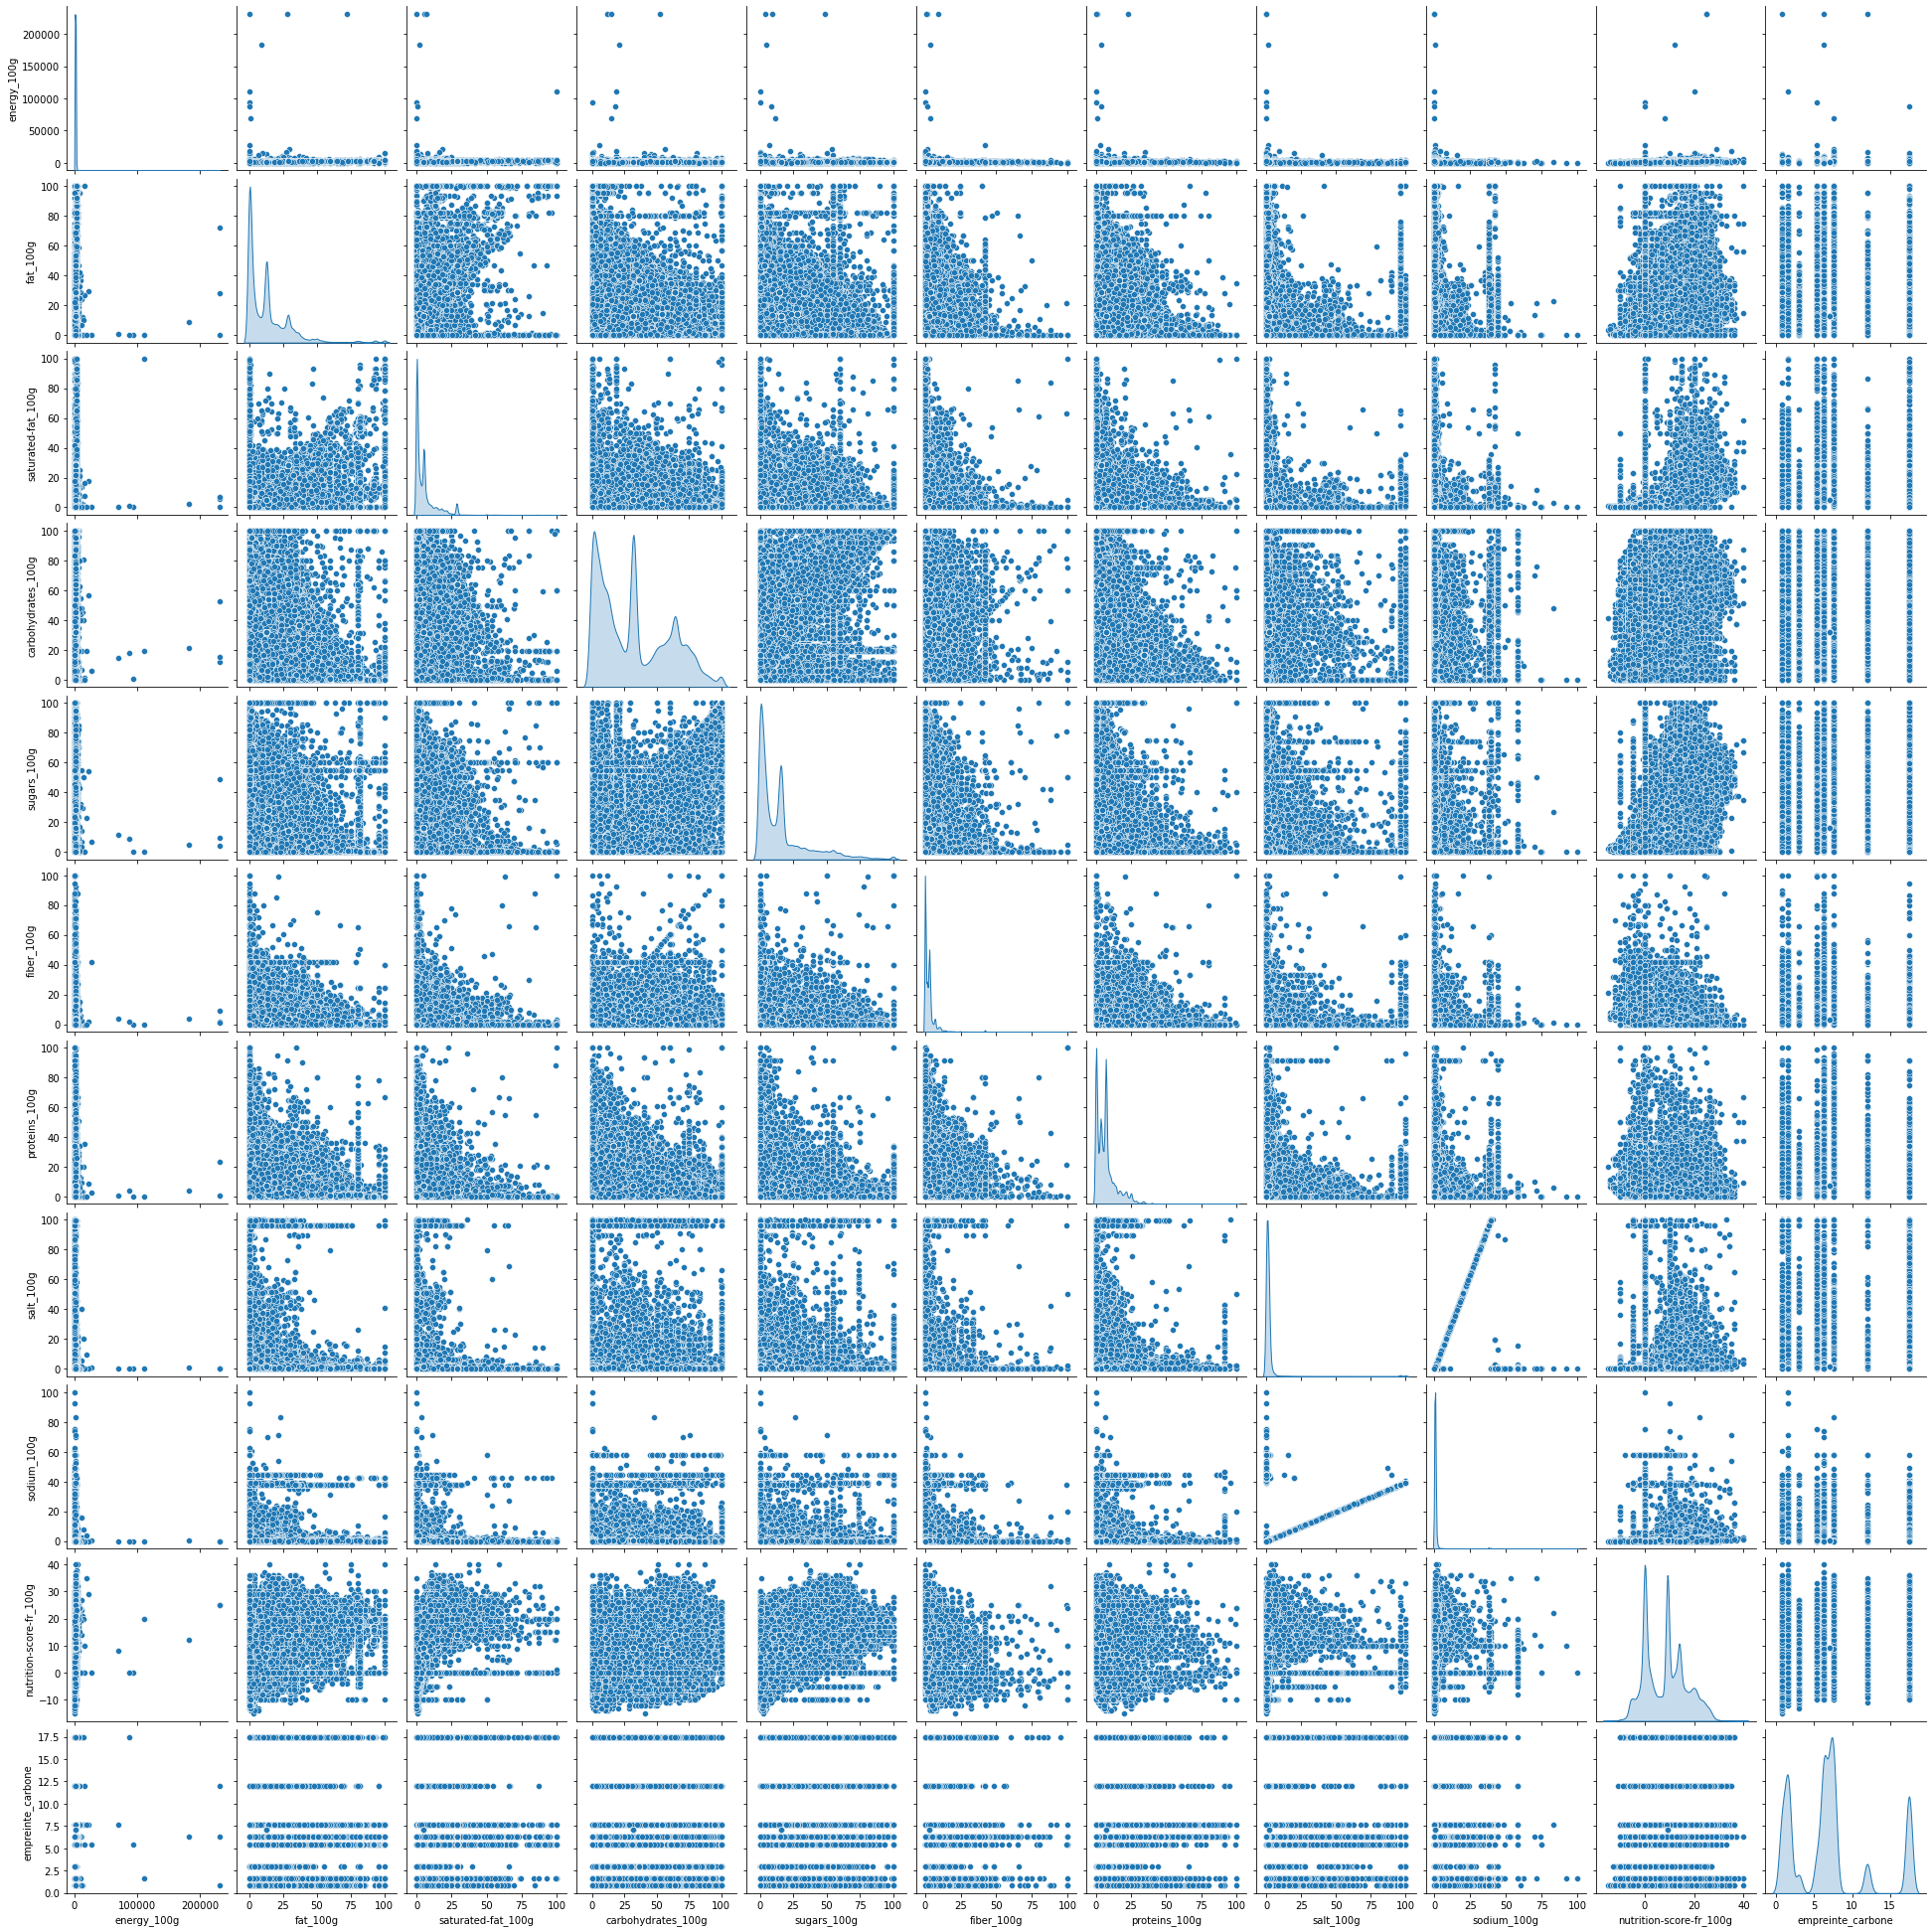

In [8]:
sns.pairplot(data_qtt_corr, diag_kind = 'kde')

<div class="alert alert-block alert-info"> Le pairplot permet de représenter en nuage de point les variables quantitatives 2 à 2. Seules les corrélations les plus fortes comme entre 'salt_100g' et 'sugar_100g' sont facilement observables par l'analyse de l'allure du nuage de point. Il est nécessaire de confirmer les corrélations en calculant le coefficient de Pearson et la covariance.

In [104]:
var1 = 'nutrition-score-fr_100g'
var2 = 'fat_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : nutrition-score-fr_100g et fat_100g
0.5
68.14


In [105]:
var1 = 'nutrition-score-fr_100g'
var2 = 'saturated-fat_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : nutrition-score-fr_100g et saturated-fat_100g
0.57
37.75


In [106]:
var1 = 'nutrition-score-fr_100g'
var2 = 'sugars_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : nutrition-score-fr_100g et sugars_100g
0.34
55.52


In [107]:
var1 = 'nutrition-score-fr_100g'
var2 = 'carbohydrates_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : nutrition-score-fr_100g et carbohydrates_100g
0.25
56.1


In [108]:
var1 = 'nutrition-score-fr_100g'
var2 = 'proteins_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : nutrition-score-fr_100g et proteins_100g
0.12
7.9


In [109]:
var1 = 'nutrition-score-fr_100g'
var2 = 'energy_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : nutrition-score-fr_100g et energy_100g
0.41
3847.06


In [114]:
var1 = 'energy_100g'
var2 = 'fat_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : energy_100g et fat_100g
0.49
9065.34


In [116]:
var1 = 'energy_100g'
var2 = 'saturated-fat_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : energy_100g et saturated-fat_100g
0.39
3589.2


In [117]:
var1 = 'energy_100g'
var2 = 'carbohydrates_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : energy_100g et carbohydrates_100g
0.33
10333.81


In [118]:
var1 = 'energy_100g'
var2 = 'sugars_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : energy_100g et sugars_100g
0.19
4220.86


In [119]:
var1 = 'energy_100g'
var2 = 'proteins_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : energy_100g et proteins_100g
0.17
1456.86


In [120]:
var1 = 'energy_100g'
var2 = 'fiber_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : energy_100g et fiber_100g
0.14
736.79


In [110]:
var1 = 'carbohydrates_100g'
var2 = 'sugars_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : carbohydrates_100g et sugars_100g
0.59
312.72


In [111]:
var1 = 'carbohydrates_100g'
var2 = 'fiber_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : carbohydrates_100g et fiber_100g
0.2
25.72


In [112]:
var1 = 'sodium_100g'
var2 = 'salt_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : sodium_100g et salt_100g
0.87
37.78


In [113]:
var1 = 'saturated-fat_100g'
var2 = 'fat_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : saturated-fat_100g et fat_100g
0.62
81.7


In [66]:
var1 = 'empreinte_carbonne'
var2 = 'nutrition-score-fr_100g'
print('coefficient de Pearson et covariance pour :', var1, 'et', var2)
print(round((st.pearsonr(data_nett[var1],data_nett[var2])[0]),2))
print(round((np.cov(data_nett[var1],data_nett[var2],ddof=0)[1,0]),2))

coefficient de Pearson et covariance pour : empreinte_carbonne et nutrition-score-fr_100g
0.03
1.44


<div class="alert alert-block alert-info"> Les corrélations sont confirmées par les calculs de covariances et du coefficient de Pearson. On confirme aussi la non corrélation entre 'empreinte_carbonne' et 'nutrition-score-fr_100g'.

### Entre variables quantitatives et qualitatives

In [121]:
print(data_nett.shape)
data_nett['categories_additives_n'] = pd.qcut(data_nett['additives_n'], 5, duplicates='drop')
print(data_nett.shape)

(320638, 22)
(320638, 23)


<AxesSubplot:xlabel='categories_additives_n'>

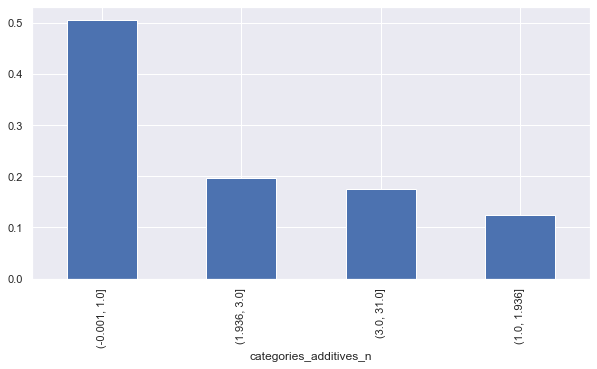

In [122]:
fig = plt.figure(figsize = (10,5))
data_nett['categories_additives_n'].value_counts(normalize=True).plot(
    kind='bar', xlabel='categories_additives_n')

In [123]:
data_nett.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   additives_n                  320638 non-null  float64 
 1   ingredients_from_palm_oil_n  320638 non-null  float64 
 2   energy_100g                  320638 non-null  float64 
 3   fat_100g                     320638 non-null  float64 
 4   saturated-fat_100g           320638 non-null  float64 
 5   trans-fat_100g               320638 non-null  float64 
 6   cholesterol_100g             320638 non-null  float64 
 7   carbohydrates_100g           320638 non-null  float64 
 8   sugars_100g                  320638 non-null  float64 
 9   fiber_100g                   320638 non-null  float64 
 10  proteins_100g                320638 non-null  float64 
 11  salt_100g                    320638 non-null  float64 
 12  sodium_100g                  320638 non-null

#### Analyse graphique

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

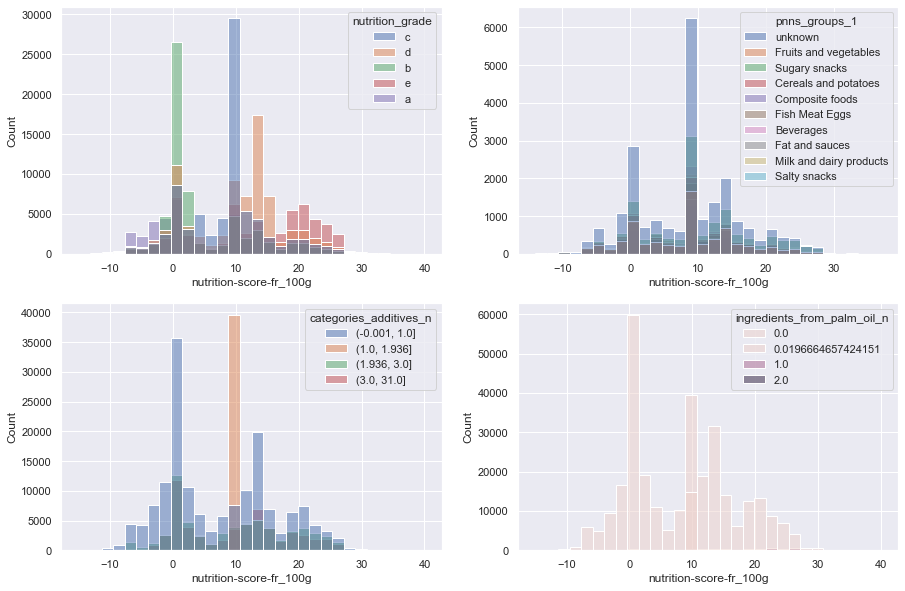

In [124]:
var="nutrition-score-fr_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_grp, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info"> Comme attendu, il y a une cohérence entre "nutrition-score-fr_100g" et "new_grade". Il semble que les produits composés d'un à deux additifs ont un Nutri-score autour de 10.
    
Avec une large majorité de produit sans ingrédients issus de l'huile de palme, il est difficile d'interpréter graphiquement le lien avec cette variable. Il en est de même pour la variable pnns_groups_1, car il y a une majorité de produits sans catégorie.


<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

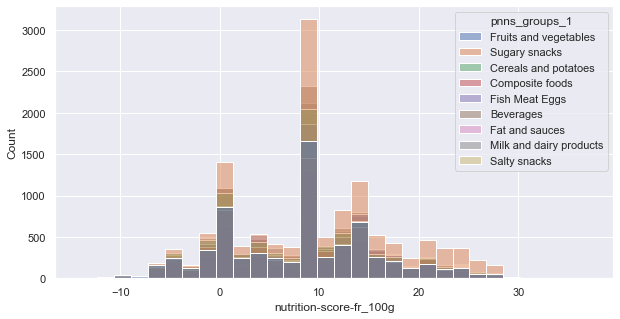

In [125]:
var="nutrition-score-fr_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Il semble que la proportion de snacks sucrés augmente avec le Nutri-score.

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

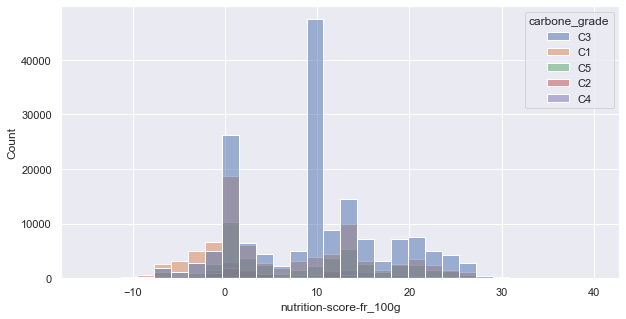

In [126]:
var="nutrition-score-fr_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Il semble que Les produits au carbonne-grade le plus faible sont aussi ceux qui ont un faible Nutri-score

<AxesSubplot:xlabel='energy_100g', ylabel='Count'>

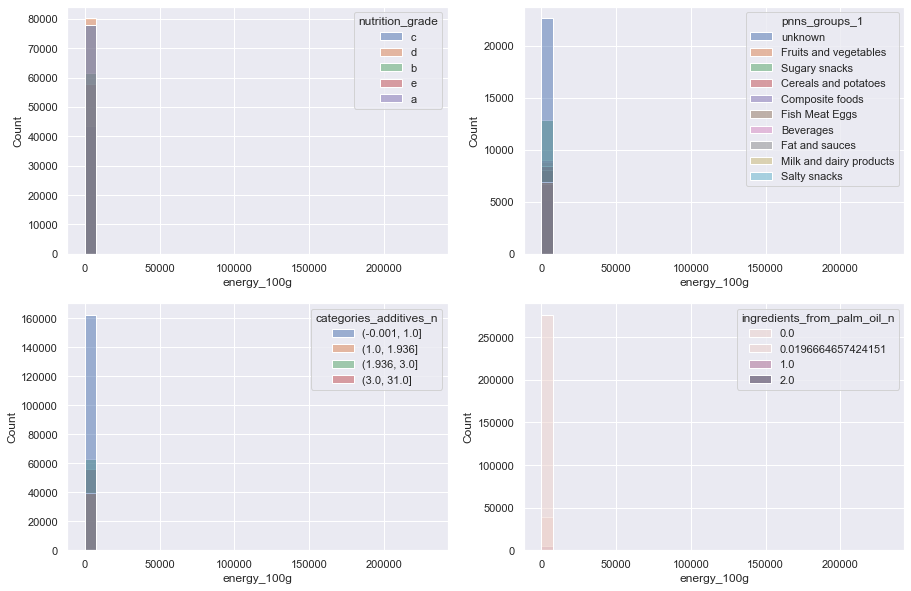

In [155]:
var="energy_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_grp, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

(0.0, 10000.0)

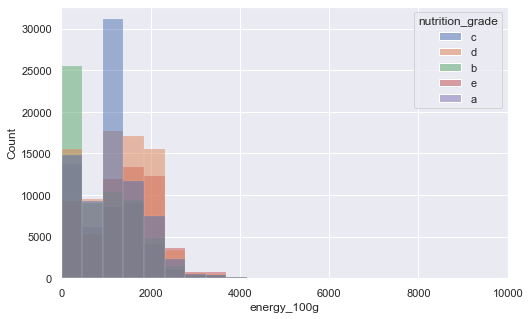

In [157]:
#Zoom pour "energy_100g"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(5,5)})
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=500)

ax.set_xlim(0, 10000)

<div class="alert alert-block alert-info"> On confirme le lien entre le Nutri-grade et l'énergie.

<AxesSubplot:xlabel='fat_100g', ylabel='Count'>

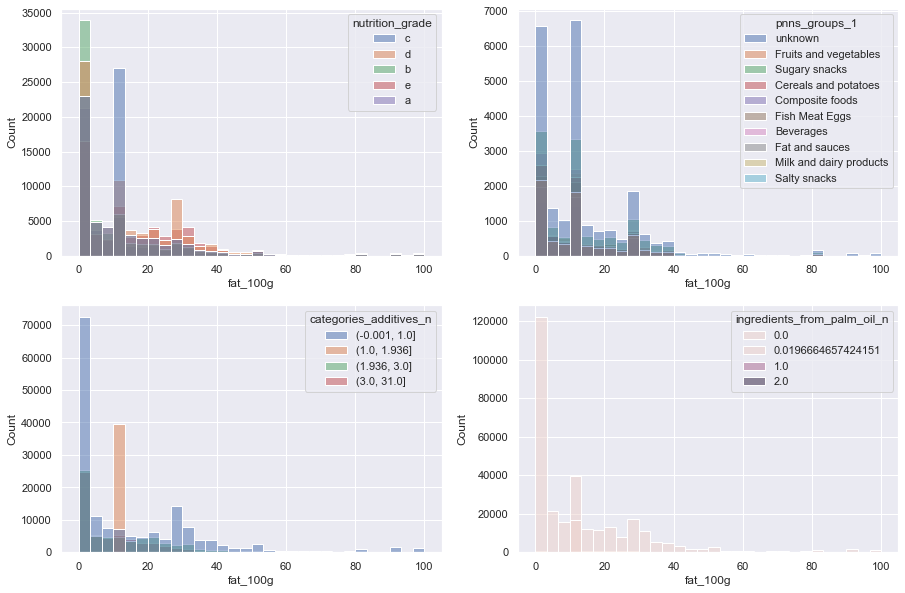

In [127]:
var="fat_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_grp, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info"> Le taux de graisse augmente avec le nutri-grade.

<AxesSubplot:xlabel='fat_100g', ylabel='Count'>

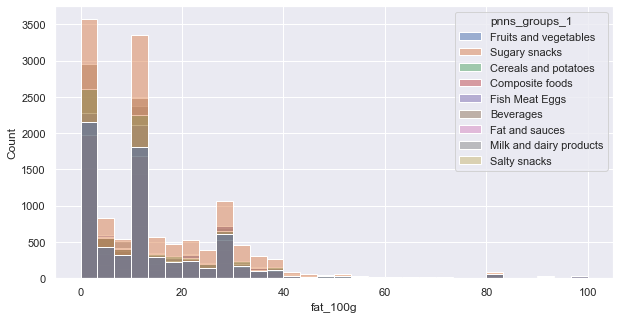

In [128]:
var="fat_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de graisse et pnns_groups_1 par cette représentation graphique.

<AxesSubplot:xlabel='fat_100g', ylabel='Count'>

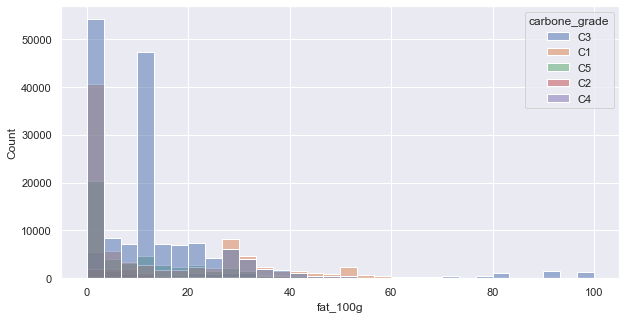

In [129]:
var="fat_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de graisse et le carbonne-grade par cette représentation graphique.

<AxesSubplot:xlabel='saturated-fat_100g', ylabel='Count'>

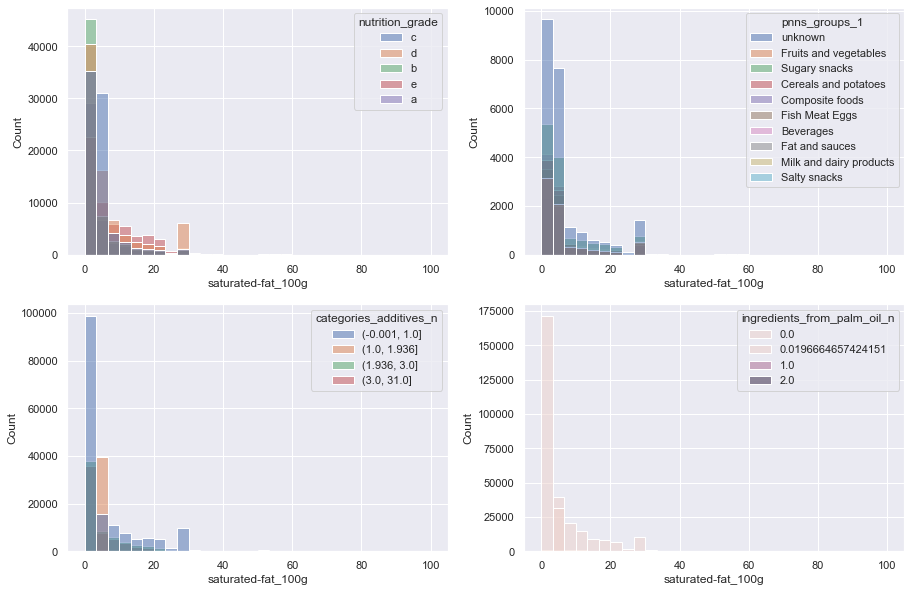

In [130]:
var="saturated-fat_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_nett, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info">Le taux de graisse saturée augmente avec le nutri-grade.

<AxesSubplot:xlabel='saturated-fat_100g', ylabel='Count'>

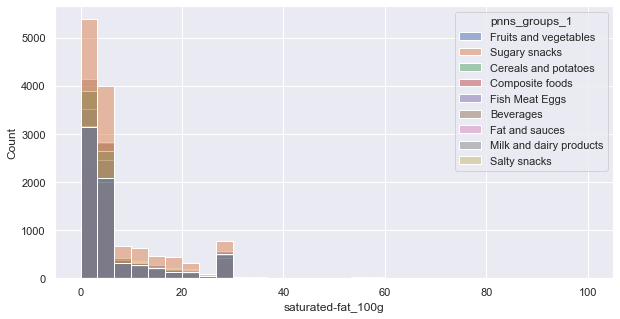

In [131]:
var="saturated-fat_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de graisse saturée et pnns_groups_1 par cette représentation graphique.

<AxesSubplot:xlabel='saturated-fat_100g', ylabel='Count'>

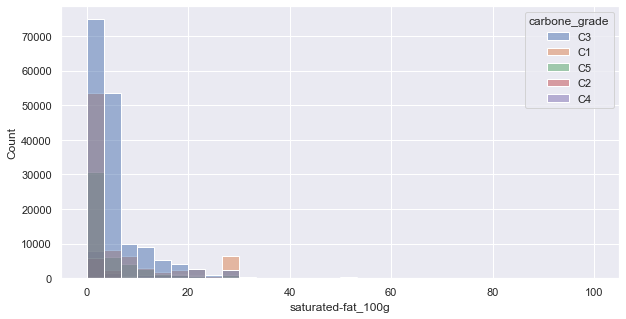

In [133]:
var="saturated-fat_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de graisse saturée et le carbonne-grade par cette représentation graphique.

<AxesSubplot:xlabel='sugars_100g', ylabel='Count'>

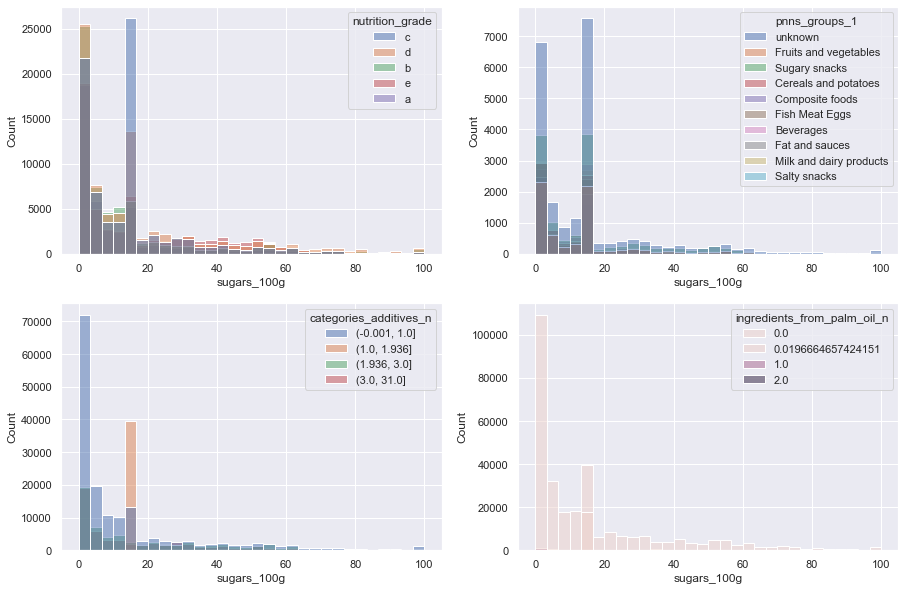

In [134]:
var="sugars_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_nett, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info">Le taux de sucre augmente avec le nutri-grade.

<AxesSubplot:xlabel='sugars_100g', ylabel='Count'>

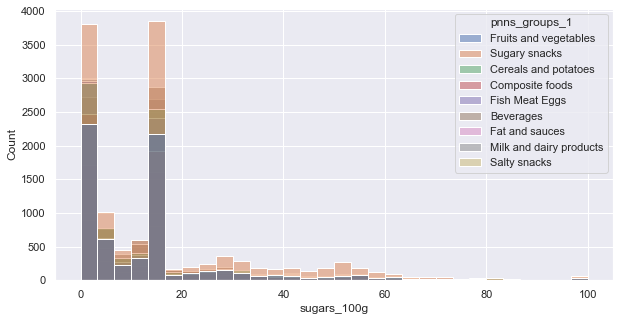

In [135]:
var="sugars_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Les snacks sucrés sont ceux qui ont les taux de sucre les plus élevés.

<AxesSubplot:xlabel='sugars_100g', ylabel='Count'>

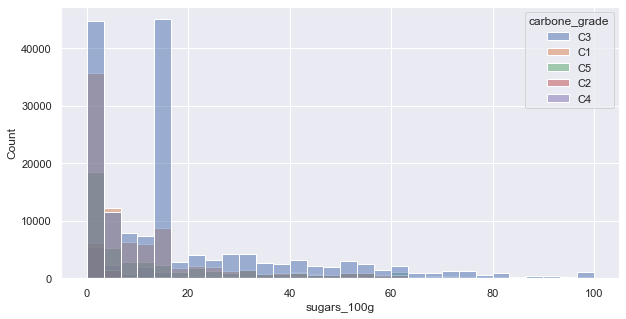

In [137]:
var="sugars_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de sucre et le carbonne-grade par cette représentation graphique.

<AxesSubplot:xlabel='proteins_100g', ylabel='Count'>

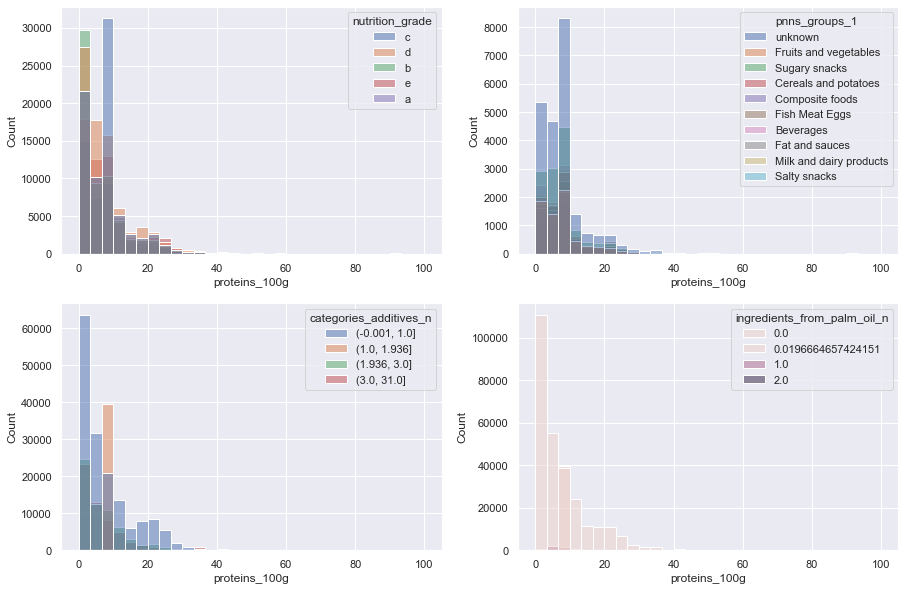

In [138]:
var="proteins_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_nett, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info"> Les produits à faible teneur en protéine ont un nutri-grade faible.

<AxesSubplot:xlabel='proteins_100g', ylabel='Count'>

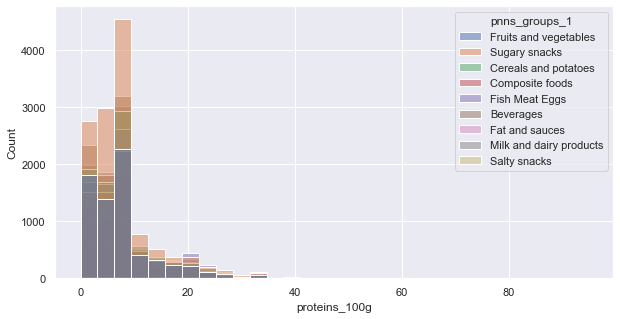

In [139]:
var="proteins_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de protéine et pnns_groups_1 par cette représentation graphique.

<AxesSubplot:xlabel='proteins_100g', ylabel='Count'>

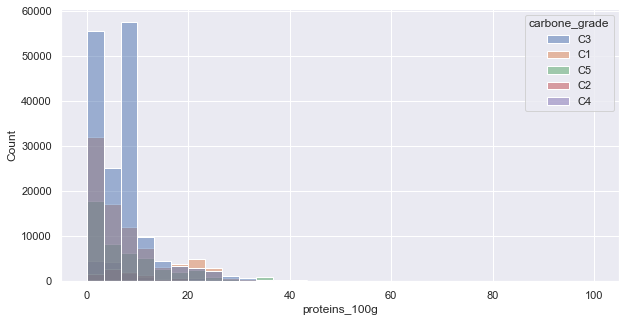

In [140]:
var="proteins_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Il semble que les taux de protéines les plus forts ont le carbonne-grade le plus élevé.

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

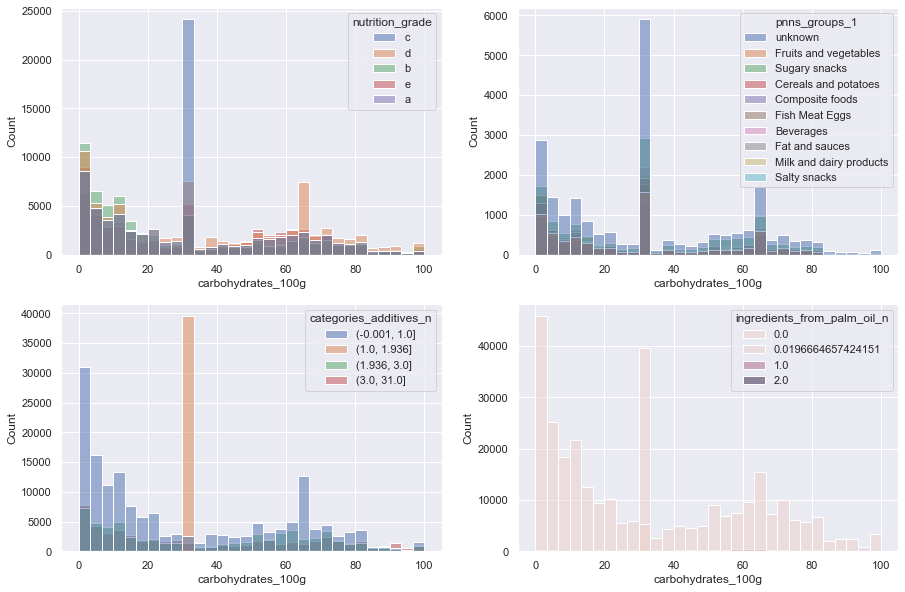

In [141]:
var="carbohydrates_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_nett, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info"> Les taux de carbohydrates les plus élevés semblent correspondre aux Nutri-scores les plus élevés.

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

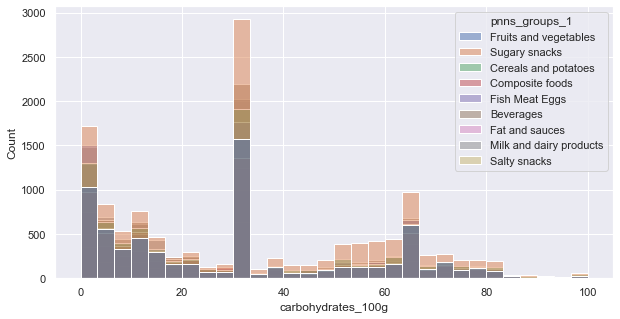

In [142]:
var="carbohydrates_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de carbohydrate et pnns_groups_1 par cette représentation graphique.

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

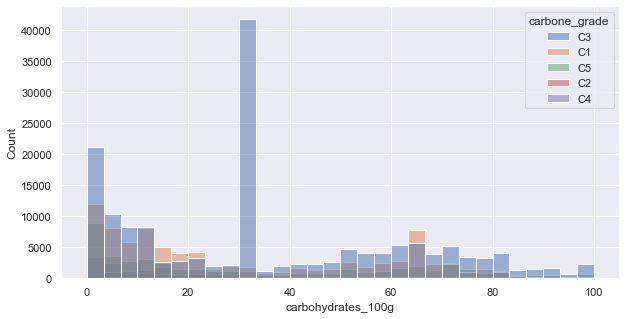

In [143]:
var="carbohydrates_100g"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Pas de lien entre le taux de carbohydrates et le carbonne-grade.

<AxesSubplot:xlabel='fiber_100g', ylabel='Count'>

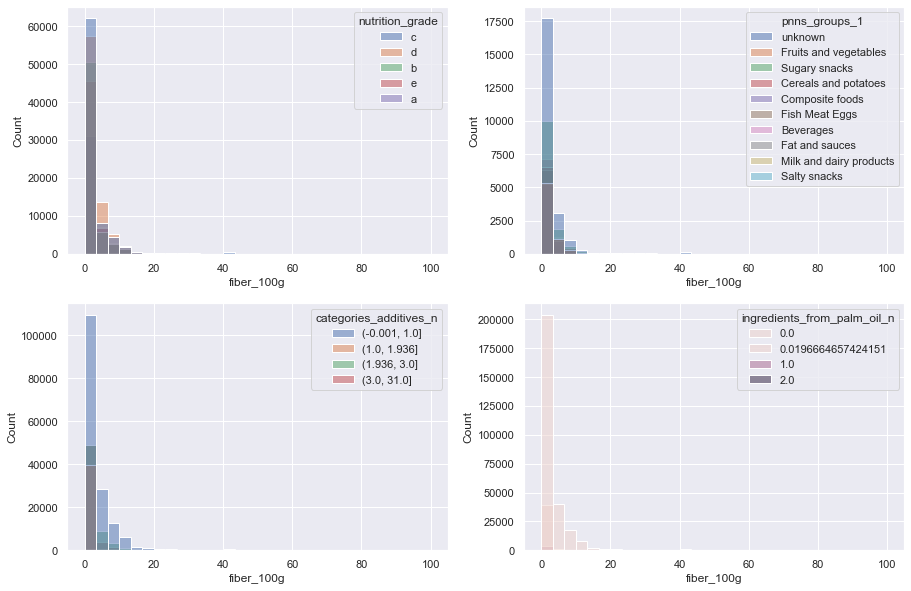

In [144]:
var="fiber_100g"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_nett, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info"> Ces représentations graphiques ne nous permettent pas de proposer une analyse.

(0.0, 20.0)

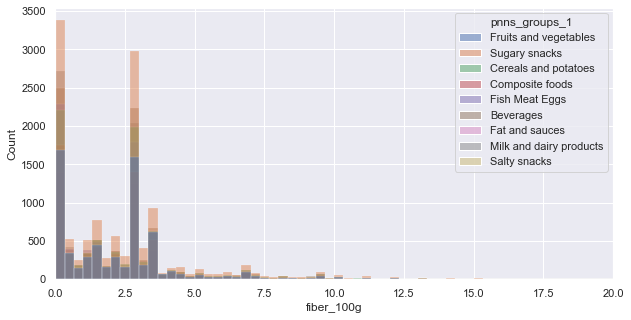

In [147]:
var="fiber_100g"
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=300)
ax.set_xlim(0, 20)

<div class="alert alert-block alert-info">Pas de liens observables entre le taux de fibre et pnns_groups_1 par cette représentation graphique.

(0.0, 20.0)

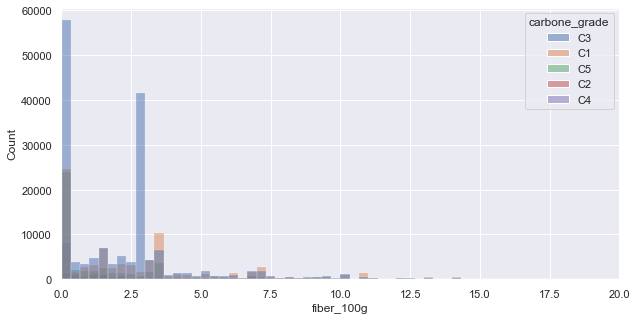

In [148]:
var="fiber_100g"
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=300)
ax.set_xlim(0, 20)

<div class="alert alert-block alert-info">Pas de lien entre le taux de fibre et le carbonne-grade visible par cette représentation graphique.

<AxesSubplot:xlabel='empreinte_carbone', ylabel='Count'>

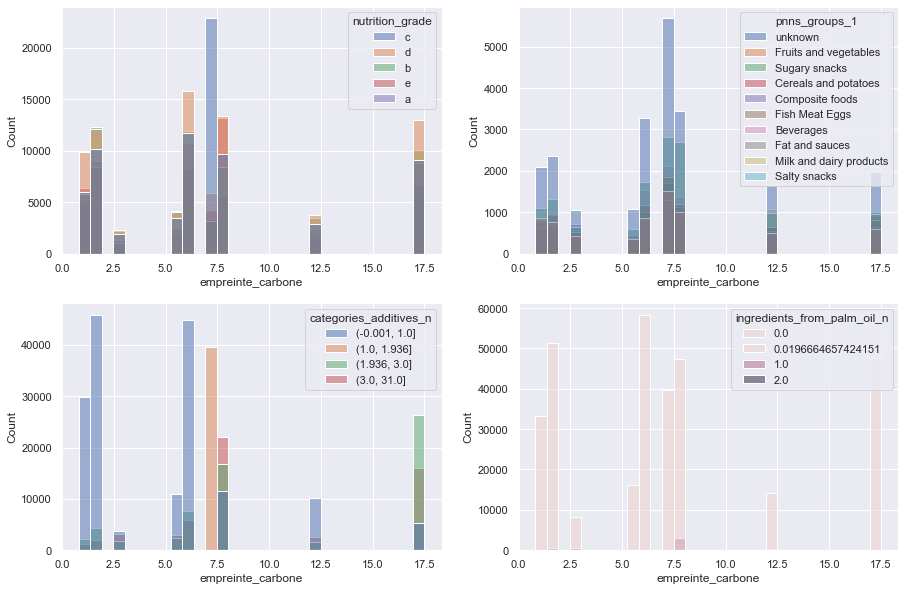

In [149]:
var="empreinte_carbone"

sns.set(rc = {'figure.figsize':(15,10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.histplot(data_nett, x=var, hue="nutrition_grade", bins=30, ax=ax1)
sns.histplot(data_nett, x=var, hue="pnns_groups_1", bins=30, ax=ax2)
sns.histplot(data_nett, x=var, hue='categories_additives_n', bins=30, ax=ax3)
sns.histplot(data_nett, x=var, hue="ingredients_from_palm_oil_n", bins=30, ax=ax4)

<div class="alert alert-block alert-info"> Pas de lien observables par analyse de ces graphiques

<AxesSubplot:xlabel='empreinte_carbone', ylabel='Count'>

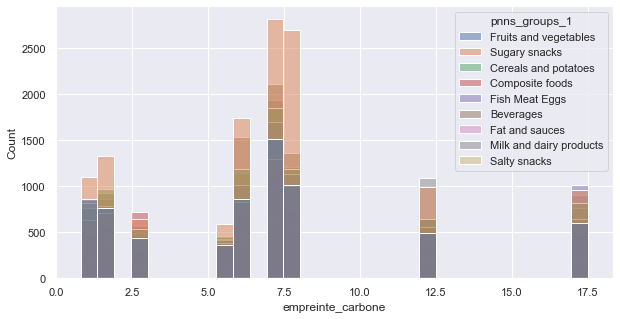

In [150]:
var="empreinte_carbone"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_grp[data_grp["pnns_groups_1"]!='unknown'], x=var, hue="pnns_groups_1", bins=30)

<div class="alert alert-block alert-info">Il est difficile de conclure sur la base de cette représentation graphique.

<AxesSubplot:xlabel='empreinte_carbone', ylabel='Count'>

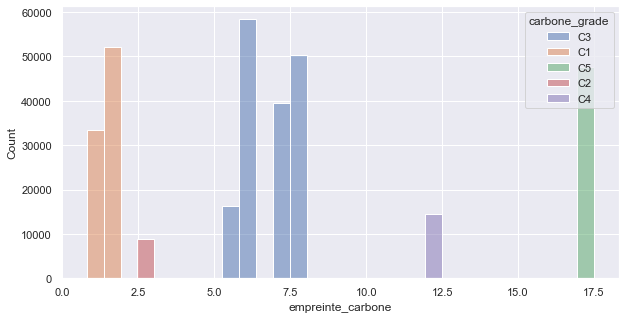

In [152]:
var="empreinte_carbone"

sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data_nett, x=var, hue="carbone_grade", bins=30)

<div class="alert alert-block alert-info">Le carbonne-score étant établi à partir de l'empreinte carbonne, nous retrouvons le liens entre ces 2 variables

#### ANOVA

In [160]:
data_nett.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g'}, inplace=True)
data_grp.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g'}, inplace=True)

C:\Users\n_a_e\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [161]:
list(data_nett.columns)

['additives_n',
 'ingredients_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition_score_fr_100g',
 'empreinte_carbone',
 'pnns_groups_1',
 'nutrition_grade',
 'carbone_grade',
 'categories_additives_n']

In [162]:
list(data_grp.columns)

['additives_n',
 'ingredients_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition_score_fr_100g',
 'empreinte_carbone',
 'pnns_groups_1',
 'nutrition_grade',
 'carbone_grade']

<AxesSubplot:xlabel='nutrition_score_fr_100g', ylabel='carbone_grade'>

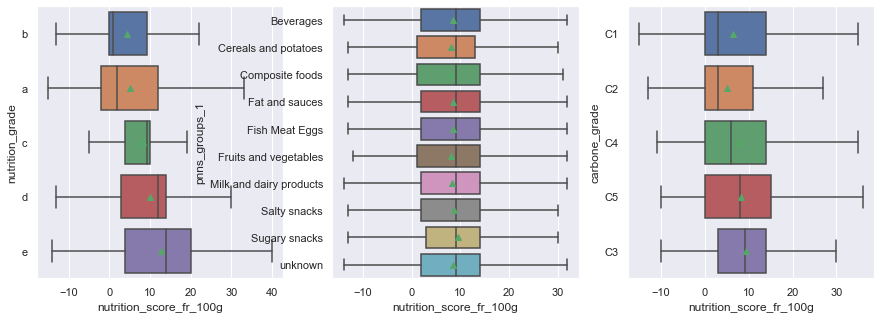

In [163]:
var='nutrition_score_fr_100g'

ordre_1 =data_nett.groupby('nutrition_grade')[var].median().sort_values().index
ordre_2 = data_grp.groupby("pnns_groups_1")[var].median().sort_values().index
ordre_3 = round(data_nett.groupby('carbone_grade')[var].median(),2).sort_values().index

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.boxplot(x=var, y="nutrition_grade", showfliers=False, orient='h', order=ordre_1, data=data_nett, showmeans=True, ax=ax1)
sns.boxplot(x=var, y="pnns_groups_1", showfliers=False, orient='h', order=ordre_2, data=data_grp, showmeans=True, ax=ax2)
sns.boxplot(x=var, y="carbone_grade", showfliers=False, orient='h', order=ordre_3, data=data_nett,showmeans=True,
            ax=ax3)

<div class="alert alert-block alert-info">Les graphiques boite à moustache montrent des différences de Nutri-score seulement en focntion du nutri-grade.

#####  Je réalise une ANOVA à 1 facteur entre la variable quantitative 'nutrition_score_fr_100g' et la variable catégorielle : 'nutrition_grade'. 

In [172]:
#Test de shapiro pour vérifier la normalité du Nutri-score, au risque alpha=5% de se tromper :
#H0 : Le Nutri-score suit une distribution normale
#H1 : Le Nutri-score ne suit pas une distribution normale

shapiro_test=st.shapiro(data_nett['nutrition_score_fr_100g'])
print(shapiro_test)

ShapiroResult(statistic=0.9659565687179565, pvalue=0.0)


C:\Users\n_a_e\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Le Nutri-score ne suit pas une loie normale. Par ailleurs le test de Shapiro perd en précision au delà de 5000 données, ce qui est le cas ici. Je décide donc de continuer l'analyse sans tenir compte de ce résultat.

In [174]:
#Test d'égalité des variances pour le Nutri-score en fonction de la variable new_grade.
#Les échantillons n'ont pas la même taille, je réalise un test de Bartlett selon les hyppothèses suivantes
#au risque alpha=5% de se tromper :

#H0 : les 5 variances sont égales
#H1 : au moins une variance est différente

bartlett_test = st.bartlett(data_nett['nutrition_score_fr_100g'][data_nett['nutrition_grade']=='a'],
                           data_nett['nutrition_score_fr_100g'][data_nett['nutrition_grade']=='b'],
                           data_nett['nutrition_score_fr_100g'][data_nett['nutrition_grade']=='c'],
                           data_nett['nutrition_score_fr_100g'][data_nett['nutrition_grade']=='d'],
                           data_nett['nutrition_score_fr_100g'][data_nett['nutrition_grade']=='e'])
print(bartlett_test)

BartlettResult(statistic=11682.737216801437, pvalue=0.0)


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Il y a au moins une variance significativement différente. Je décide tout de même de lancer l'ANOVA pour juger de la pertinence des résultats.

In [175]:
mod = ols('nutrition_score_fr_100g ~ nutrition_grade', data=data_nett).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq        df             F  PR(>F)
nutrition_grade  2.799986e+06       4.0  11632.679653     0.0
Residual         1.929409e+07  320633.0           NaN     NaN


<div class="alert alert-block alert-info"> <b> La probabilité pour que F calculée > F théorique est infèrieure à 0.05.
On rejette donc H0 et on accepte H1, au risque alpha=5% de se tromper. Au moins une variance est différente. Il semble donc qu'il y est un effet du Nutri-grade sur le Nutri-score. Attention tout de même car les conditions de normalité et d'égalité des variances ne sont pa sremplies.<b/>

<AxesSubplot:xlabel='energy_100g', ylabel='carbone_grade'>

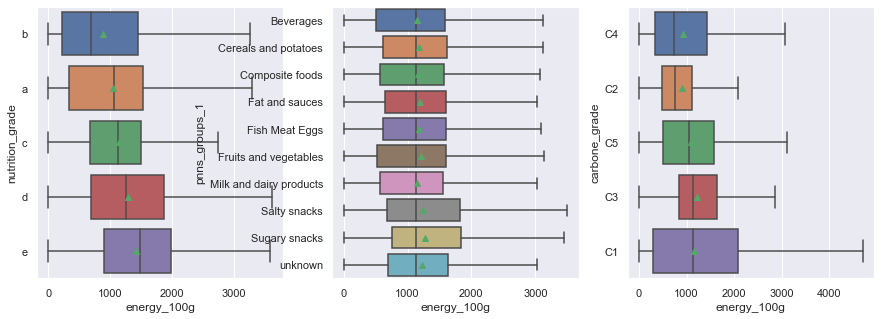

In [191]:
var='energy_100g'

ordre_1 =data_nett.groupby('nutrition_grade')[var].median().sort_values().index
ordre_2 = data_grp.groupby("pnns_groups_1")[var].median().sort_values().index
ordre_3 = round(data_nett.groupby('carbone_grade')[var].median(),2).sort_values().index

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.boxplot(x=var, y="nutrition_grade", showfliers=False, orient='h', order=ordre_1, data=data_nett, showmeans=True, ax=ax1)
sns.boxplot(x=var, y="pnns_groups_1", showfliers=False, orient='h', order=ordre_2, data=data_grp, showmeans=True, ax=ax2)
sns.boxplot(x=var, y="carbone_grade", showfliers=False, orient='h', order=ordre_3, data=data_nett,showmeans=True,
            ax=ax3)

#####  Je réalise une ANOVA à 1 facteur entre la variable quantitative 'energy_100g' et la variable catégorielle : 'nutrition_grade'. 

In [192]:
#Test de shapiro pour vérifier la normalité de l'énergie, au risque alpha=5% de se tromper :
#H0 : Le Nutri-score suit une distribution normale
#H1 : Le Nutri-score ne suit pas une distribution normale

shapiro_test=st.shapiro(data_nett['energy_100g'])
print(shapiro_test)

ShapiroResult(statistic=0.45363372564315796, pvalue=0.0)


C:\Users\n_a_e\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. L'énergie ne suit pas une loie normale. Par ailleurs le test de Shapiro perd en précision au delà de 5000 données, ce qui est le cas ici. Je décide donc de continuer l'analyse sans tenir compte de ce résultat.

In [193]:
#Test d'égalité des variances pour l'énergie en fonction de la variable new_grade.
#Les échantillons n'ont pas la même taille, je réalise un test de Bartlett selon les hyppothèses suivantes
#au risque alpha=5% de se tromper :

#H0 : les 5 variances sont égales
#H1 : au moins une variance est différente

bartlett_test = st.bartlett(data_nett['energy_100g'][data_nett['nutrition_grade']=='a'],
                           data_nett['energy_100g'][data_nett['nutrition_grade']=='b'],
                           data_nett['energy_100g'][data_nett['nutrition_grade']=='c'],
                           data_nett['energy_100g'][data_nett['nutrition_grade']=='d'],
                           data_nett['energy_100g'][data_nett['nutrition_grade']=='e'])
print(bartlett_test)

BartlettResult(statistic=63255.57070129634, pvalue=0.0)


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Il y a au moins une variance significativement différente. Je décide tout de même de lancer l'ANOVA pour juger de la pertinence des résultats.

In [194]:
mod = ols('energy_100g ~ nutrition_grade', data=data_nett).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq        df           F  PR(>F)
nutrition_grade  1.062458e+10       4.0  2118.31475     0.0
Residual         4.020402e+11  320633.0         NaN     NaN


<div class="alert alert-block alert-info"> <b> La probabilité pour que F calculée > F théorique est infèrieure à 0.05.
On rejette donc H0 et on accepte H1, au risque alpha=5% de se tromper. Au moins une variance est différente. Il semble donc qu'il y est un effet du Nutri-grade sur le Nutri-score. Attention tout de même car les conditions de normalité et d'égalité des variances ne sont pa sremplies.<b/>

<AxesSubplot:xlabel='empreinte_carbone', ylabel='carbone_grade'>

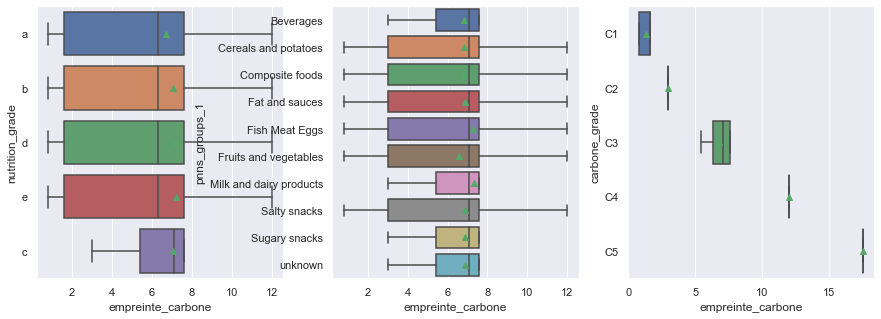

In [195]:
var='empreinte_carbone'

ordre_1 =data_nett.groupby('nutrition_grade')[var].median().sort_values().index
ordre_2 = data_grp.groupby("pnns_groups_1")[var].median().sort_values().index
ordre_3 = data_nett.groupby('carbone_grade')[var].median().sort_values().index

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.boxplot(x=var, y="nutrition_grade", showfliers=False, orient='h', order=ordre_1, data=data_nett, showmeans=True, ax=ax1)
sns.boxplot(x=var, y="pnns_groups_1", showfliers=False, orient='h', order=ordre_2, data=data_grp, showmeans=True, ax=ax2)
sns.boxplot(x=var, y="carbone_grade", showfliers=False, orient='h', order=ordre_3, data=data_nett,showmeans=True,
            ax=ax3)

#####  Je réalise une ANOVA à 1 facteur entre la variable quantitative 'empreinte_carbonne' et la variable catégorielle : 'carbone_grade'. 

<div class="alert alert-block alert-info">D'après l'analyse des graphiques boite à moustache, l'empreinte carbonne varie avec le carbonne_grade seulement.

In [196]:
#Test de shapiro pour vérifier la normalité du l'empreinte carbonne, au risque alpha=5% de se tromper :
#H0 : l'empreinte carbonne suit une distribution normale
#H1 : l'empreinte carbonne ne suit pas une distribution normale

shapiro_test=st.shapiro(data_nett['empreinte_carbone'])
print(shapiro_test)

ShapiroResult(statistic=0.8352805376052856, pvalue=0.0)


C:\Users\n_a_e\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. L'empreinte carbonne ne suit pas une loie normale. Par ailleurs le test de Shapiro perd en précision au delà de 5000 données, ce qui est le cas ici. Je décide donc de continuer l'analyse sans tenir compte de ce résultat.

In [197]:
#Test d'égalité des variances pour l'empreinte carbonne en fonction de la variable carbonne_grade.
#Les échantillons n'ont pas la même taille, je réalise un test de Bartlett selon les hyppothèses suivantes
#au risque alpha=5% de se tromper :

#H0 : les 5 variances sont égales
#H1 : au moins une variance est différente

bartlett_test = st.bartlett(data_nett['empreinte_carbone'][data_nett['carbone_grade']=='C1'],
                           data_nett['empreinte_carbone'][data_nett['carbone_grade']=='C2'],
                           data_nett['empreinte_carbone'][data_nett['carbone_grade']=='C3'],
                           data_nett['empreinte_carbone'][data_nett['carbone_grade']=='C4'],
                           data_nett['empreinte_carbone'][data_nett['carbone_grade']=='C5'])
print(bartlett_test)

BartlettResult(statistic=inf, pvalue=0.0)


C:\Users\n_a_e\anaconda3\lib\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


<div class="alert alert-block alert-info">Il semble qu'il y est des variances nulles. Le test n'est pas concluant. Mais l'analyse du graphique boite à moustache montre que les variances ne sont pas égales. Je décide tout de même d'aller au bout du test. 

In [198]:
mod = ols('empreinte_carbone ~ carbone_grade', data=data_nett).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq        df             F  PR(>F)
carbone_grade  8.541583e+06       4.0  7.207887e+06     0.0
Residual       9.499016e+04  320633.0           NaN     NaN


<div class="alert alert-block alert-info"> <b> La probabilité pour que F calculée > F théorique est infèrieure à 0.05.
On rejette donc H0 et on accepte H1, au risque alpha=5% de se tromper. Au moins une variance est différente. Il semble donc qu'il y est un effet du carbonne_grade sur l'empreinte carbonne. Attention tout de même car les conditions de normalité et d'égalité des variances ne sont pas remplies.<b/>

<AxesSubplot:xlabel='fat_100g', ylabel='carbone_grade'>

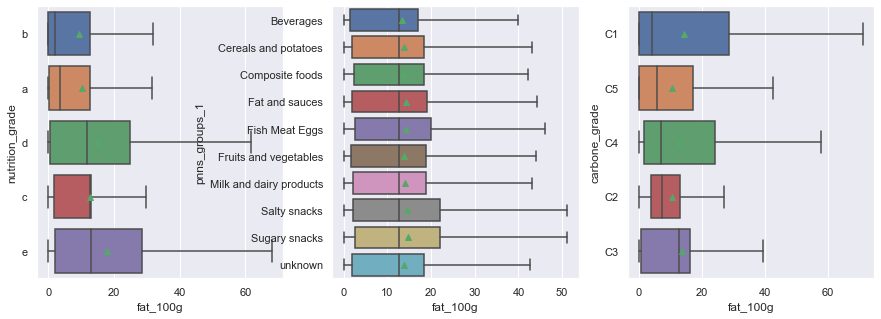

In [199]:
var='fat_100g'

ordre_1 =data_nett.groupby('nutrition_grade')[var].median().sort_values().index
ordre_2 = data_grp.groupby("pnns_groups_1")[var].median().sort_values().index
ordre_3 = data_nett.groupby('carbone_grade')[var].median().sort_values().index

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.boxplot(x=var, y="nutrition_grade", showfliers=False, orient='h', order=ordre_1, data=data_nett, showmeans=True, ax=ax1)
sns.boxplot(x=var, y="pnns_groups_1", showfliers=False, orient='h', order=ordre_2, data=data_grp, showmeans=True, ax=ax2)
sns.boxplot(x=var, y="carbone_grade", showfliers=False, orient='h', order=ordre_3, data=data_nett,showmeans=True,
            ax=ax3)

<div class="alert alert-block alert-info">D'après l'analyse des graphiques boite à moustache, le taux de graisse semble varier le plus avec le Nutri-grade (new_grade).

#####  Je réalise une ANOVA à 1 facteur entre la variable quantitative 'fat_100g' et la variable catégorielle : 'nutrition_grade'. 

In [200]:
#Test de shapiro pour vérifier la normalité du l'empreinte carbonne, au risque alpha=5% de se tromper :
#H0 : le taux de graisse suit une distribution normale
#H1 : le taux de graisse ne suit pas une distribution normale

shapiro_test=st.shapiro(data_nett['fat_100g'])
print(shapiro_test)

ShapiroResult(statistic=0.7645012140274048, pvalue=0.0)


C:\Users\n_a_e\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Le taux de graisse ne suit pas une loie normale. Par ailleurs le test de Shapiro perd en précision au delà de 5000 données, ce qui est le cas ici. Je décide donc de continuer l'analyse sans tenir compte de ce résultat.

In [201]:
#Test d'égalité des variances pour le taux de graisse en fonction de la variable new_grade.
#Les échantillons n'ont pas la même taille, je réalise un test de Bartlett selon les hyppothèses suivantes
#au risque alpha=5% de se tromper :

#H0 : les 5 variances sont égales
#H1 : au moins une variance est différente

bartlett_test = st.bartlett(data_nett['fat_100g'][data_nett['nutrition_grade']=='a'],
                           data_nett['fat_100g'][data_nett['nutrition_grade']=='b'],
                           data_nett['fat_100g'][data_nett['nutrition_grade']=='c'],
                           data_nett['fat_100g'][data_nett['nutrition_grade']=='d'],
                           data_nett['fat_100g'][data_nett['nutrition_grade']=='e'])
print(bartlett_test)

BartlettResult(statistic=4767.087504907989, pvalue=0.0)


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Il y a au moins une variance significativement différente. Je décide tout de même de lancer l'ANOVA pour juger de la pertinence des résultats.

In [202]:
mod = ols('fat_100g ~ nutrition_grade', data=data_nett).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq        df            F  PR(>F)
nutrition_grade  2.839560e+06       4.0  2758.090795     0.0
Residual         8.252597e+07  320633.0          NaN     NaN


<div class="alert alert-block alert-info"> <b> La probabilité pour que F calculée > F théorique est infèrieure à 0.05.
On rejette donc H0 et on accepte H1, au risque alpha=5% de se tromper. Au moins une variance est différente. Il semble donc qu'il y est un effet du taux de graisse sur le Nutri-grade. Attention tout de même car les conditions de normalité et d'égalité des variances ne sont pas remplies.<b/>

<AxesSubplot:xlabel='sugars_100g', ylabel='carbone_grade'>

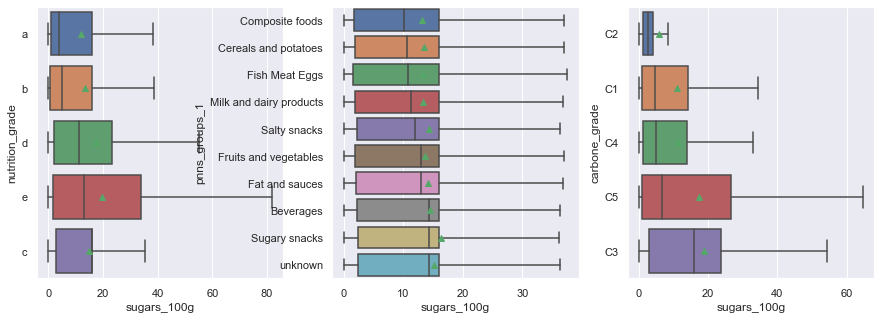

In [203]:
var='sugars_100g'

ordre_1 =data_nett.groupby('nutrition_grade')[var].median().sort_values().index
ordre_2 = data_grp.groupby("pnns_groups_1")[var].median().sort_values().index
ordre_3 = data_nett.groupby('carbone_grade')[var].median().sort_values().index

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.boxplot(x=var, y="nutrition_grade", showfliers=False, orient='h', order=ordre_1, data=data_nett, showmeans=True, ax=ax1)
sns.boxplot(x=var, y="pnns_groups_1", showfliers=False, orient='h', order=ordre_2, data=data_grp, showmeans=True, ax=ax2)
sns.boxplot(x=var, y="carbone_grade", showfliers=False, orient='h', order=ordre_3, data=data_nett,showmeans=True,
            ax=ax3)

<div class="alert alert-block alert-info">D'après l'analyse des graphiques boite à moustache, le taux de sucre semble varier avec le Nutri-grade (new_grade) et les catégories (pnns_group_1).

#####  Je réalise deux ANOVA à 1 facteur entre la variable quantitative 'sugars_100g' et les deux variables catégorielles : 'nutrition_grade' et ''pnns_group_1". 

In [204]:
#Test de shapiro pour vérifier la normalité du l'empreinte carbonne, au risque alpha=5% de se tromper :
#H0 : le taux de sucre suit une distribution normale
#H1 : le taux de sucre ne suit pas une distribution normale

shapiro_test=st.shapiro(data_nett['sugars_100g'])
print(shapiro_test)
shapiro_test2=st.shapiro(data_grp['sugars_100g'])
print(shapiro_test2)

ShapiroResult(statistic=0.7695466876029968, pvalue=0.0)
ShapiroResult(statistic=0.7572007179260254, pvalue=0.0)


C:\Users\n_a_e\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05 pour les deux data sets. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Le taux de sucre ne suit pas une loie normale. Par ailleurs le test de Shapiro perd en précision au delà de 5000 données, ce qui est le cas ici. Je décide donc de continuer l'analyse sans tenir compte de ce résultat.

In [205]:
#Test d'égalité des variances pour le taux de sucre en fonction de la variable new_grade.
#Les échantillons n'ont pas la même taille, je réalise un test de Bartlett selon les hyppothèses suivantes
#au risque alpha=5% de se tromper :

#H0 : les 5 variances sont égales
#H1 : au moins une variance est différente

bartlett_test = st.bartlett(data_nett['sugars_100g'][data_nett['nutrition_grade']=='a'],
                           data_nett['sugars_100g'][data_nett['nutrition_grade']=='b'],
                           data_nett['sugars_100g'][data_nett['nutrition_grade']=='c'],
                           data_nett['sugars_100g'][data_nett['nutrition_grade']=='d'],
                           data_nett['sugars_100g'][data_nett['nutrition_grade']=='e'])
print(bartlett_test)

BartlettResult(statistic=8996.352141758962, pvalue=0.0)


<div class="alert alert-block alert-info">La pvalue est infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Il y a au moins une variance significativement différente. Je décide tout de même de lancer l'ANOVA pour juger de la pertinence des résultats.

In [206]:
#Test d'égalité des variances pour le taux de graisse en fonction de la variable new_grade.
#Les échantillons n'ont pas la même taille, je réalise un test de Bartlett selon les hyppothèses suivantes
#au risque alpha=5% de se tromper :

#H0 : les 10 variances sont égales
#H1 : au moins une variance est différente

bartlett_test = st.bartlett(data_grp['sugars_100g'][data_grp['pnns_groups_1']=='unknown'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Fruits and vegetables'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Sugary snacks'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Cereals and potatoes'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Composite foods'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Fish Meat Eggs'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Beverages'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Fat and sauces'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Milk and dairy products'],
                           data_grp['sugars_100g'][data_grp['pnns_groups_1']=='Salty snacks'])
print(bartlett_test)

BartlettResult(statistic=234.95266952127812, pvalue=1.4889459450694696e-45)


<div class="alert alert-block alert-info">La pvalue est très infèrieure à 0.05. On rejette H0 et on accepte H1 au risqe alpha=5% de se tromper. Il y a au moins une variance significativement différente. Je décide tout de même de lancer l'ANOVA pour juger de la pertinence des résultats.

In [207]:
mod = ols('sugars_100g ~ nutrition_grade', data=data_nett).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq        df            F  PR(>F)
nutrition_grade  2.202440e+06       4.0  1452.311076     0.0
Residual         1.215605e+08  320633.0          NaN     NaN


<div class="alert alert-block alert-info"> <b> La probabilité pour que F calculée > F théorique est infèrieure à 0.05.
On rejette donc H0 et on accepte H1, au risque alpha=5% de se tromper. Au moins une variance est différente. Il semble donc qu'il y est un effet du taux de graisse sur le Nutri-grade. Attention tout de même car les conditions de normalité et d'égalité des variances ne sont pas remplies.<b/>

In [208]:
mod = ols('sugars_100g ~ pnns_groups_1', data=data_grp).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq       df          F        PR(>F)
pnns_groups_1  9.940473e+04      9.0  39.827744  1.379401e-71
Residual       2.535883e+07  91443.0        NaN           NaN


<div class="alert alert-block alert-info"> <b> D'après la table de Fisher(alpha=5%), La probabilité pour que F calculée > F théorique est infèrieure à 0.05.
On rejette donc H0 et on accepte H1, au risque alpha=5% de se tromper. Au moins une variance est différente. Il semble donc qu'il y est un effet du taux de graisse sur le Nutri-grade. Attention tout de même car les conditions de normalité et d'égalité des variances ne sont pas remplies.<b/>

## Entre variables qualitatives 

### "pnns_groups_1" et "new_grade"

nutrition_grade              a      b      c      d      e  Total
pnns_groups_1                                                    
Beverages                  558   1520   2805   1546   2597   9026
Cereals and potatoes      3583   1407   1998   1162    302   8452
Composite foods           1431   2017   1994   1107    197   6746
Fat and sauces             218    576   1545   1960    911   5210
Fish Meat Eggs             754   1285   2466   2114   1417   8036
Fruits and vegetables     3168   1265   1548    618    295   6894
Milk and dairy products    779   1809   2459   3260    518   8825
Salty snacks                90    181    832   1272    431   2806
Sugary snacks              288    890   1936   4295   5443  12852
unknown                   2469   4285   7203   5286   3363  22606
Total                    13338  15235  24786  22620  15474  91453


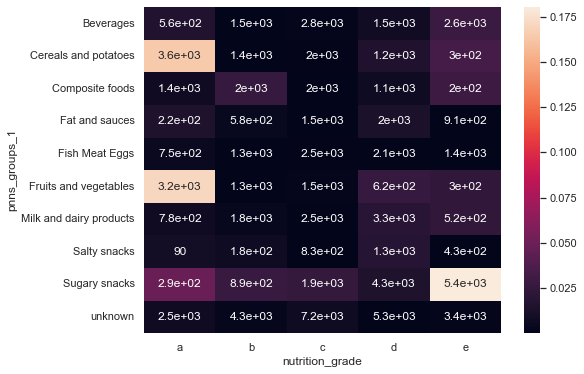

In [209]:
#Table de contingence
X = "pnns_groups_1"
Y = "nutrition_grade"

cont = data_grp[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(cont)

#Heatmap
plt.figure(figsize=(8,6))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_grp)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [210]:
#Table des p-values
table

nutrition_grade                 a             b         c         d         e  \
pnns_groups_1                                                                   
Beverages                0.016033  6.543022e-06  0.001930  0.007746  0.027498   
Cereals and potatoes     0.164441  2.628805e-08  0.001372  0.015133  0.032654   
Composite foods          0.007456  2.605023e-02  0.000551  0.006935  0.028675   
Fat and sauces           0.014179  3.603047e-03  0.000459  0.012835  0.000036   
Fish Meat Eggs           0.005471  7.905544e-05  0.001398  0.000295  0.000089   
Fruits and vegetables    0.170677  4.339558e-04  0.002017  0.025435  0.023892   
Milk and dairy products  0.007360  2.866067e-03  0.000069  0.019508  0.023371   
Salty snacks             0.009138  6.441176e-03  0.000247  0.017662  0.000148   
Sugary snacks            0.049269  2.682279e-02  0.025219  0.014382  0.180264   
unknown                  0.007630  2.625738e-03  0.006937  0.000612  0.002047   
Total                    0.000000  0.000000e+00  0.000000  0.000000  0.000000   

nutrition_grade          Total  
pnns_groups_1                   
Beverages                  0.0  
Cereals and potatoes       0.0  
Composite foods            0.0  
Fat and sauces             0.0  
Fish Meat Eggs             0.0  
Fruits and vegetables      0.0  
Milk and dairy products    0.0  
Salty snacks               0.0  
Sugary snacks              0.0  
unknown                    0.0  
Total                      0.0

In [211]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [212]:
#pvalue du test
st_p

0.0

<div class="alert alert-block alert-info"> <b> La pvalue est infèrieure à 0.05. Je rejette H0 et accepte H1 au risque alpha=5% de me tromper. Il existe un lien entre la catégorie des produits et leur Nutri-grade.
    
En observant la heatmap, je constate que les différences les plus fortes impliques 3 cases, qui peuvent expliquer cette non-indépendance :
- fruits et légumes pour un Nutri-grade a
- Céréales et pomme de terre pour un Nutri-grade a
- Snacks sucrés pour un Nutri-grade e.<b/>

### "pnns_groups_1" et "carbone_grade"

carbone_grade               C1    C2     C3    C4    C5  Total
pnns_groups_1                                                 
Beverages                 1772   421   5426   647   760   9026
Cereals and potatoes      1791   529   4676   645   811   8452
Composite foods           1334   718   3499   552   643   6746
Fat and sauces            1035   307   2983   415   470   5210
Fish Meat Eggs            1548   566   4262   646  1014   8036
Fruits and vegetables     1623   437   3750   490   594   6894
Milk and dairy products   1617   478   4740  1091   899   8825
Salty snacks               579   138   1633   214   242   2806
Sugary snacks             2422   642   7831   995   962  12852
unknown                   4453  1050  13470  1651  1982  22606
Total                    18174  5286  52270  7346  8377  91453


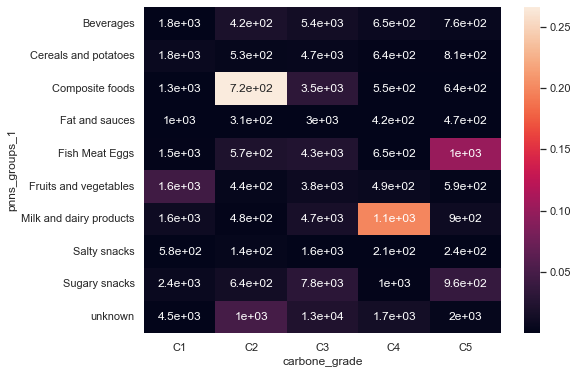

In [213]:
#Table de contingence
X = "pnns_groups_1"
Y = "carbone_grade"

cont = data_grp[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(cont)

#Heatmap
plt.figure(figsize=(8,6))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_grp)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [214]:
#Table des p-values
table

carbone_grade                      C1        C2        C3            C4  \
pnns_groups_1                                                             
Beverages                2.526295e-04  0.018720  0.013326  8.084642e-03   
Cereals and potatoes     7.112140e-03  0.003229  0.004774  1.631104e-03   
Composite foods          3.128176e-05  0.265835  0.031775  1.821793e-04   
Fat and sauces           1.188063e-07  0.000110  0.000009  2.811462e-05   
Fish Meat Eggs           1.445168e-03  0.021367  0.022969  3.804392e-07   
Fruits and vegetables    4.498941e-02  0.003587  0.008848  7.070454e-03   
Milk and dairy products  1.026847e-02  0.001944  0.017637  1.983715e-01   
Salty snacks             7.892328e-04  0.003474  0.000513  5.545906e-04   
Sugary snacks            6.571216e-03  0.013184  0.030893  1.300783e-03   
unknown                  3.323987e-04  0.048539  0.022508  1.440979e-02   
Total                    0.000000e+00  0.000000  0.000000  0.000000e+00   

carbone_grade                  C5  Total  
pnns_groups_1                             
Beverages                0.005193    0.0  
Cereals and potatoes     0.001685    0.0  
Composite foods          0.000980    0.0  
Fat and sauces           0.000105    0.0  
Fish Meat Eggs           0.101044    0.0  
Fruits and vegetables    0.002143    0.0  
Milk and dairy products  0.009787    0.0  
Salty snacks             0.000846    0.0  
Sugary snacks            0.037894    0.0  
unknown                  0.003658    0.0  
Total                    0.000000    0.0

In [215]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [216]:
#pvalue du test
st_p

8.069229992256265e-185

<div class="alert alert-block alert-info"> <b> La pvalue est très infèrieure à 0.05. Je rejette H0 et accepte H1 au risque alpha=5% de me tromper. Il existe un lien entre la catégorie des produits et leur carbone-grade.
    
En observant la heatmap, je constate que les différences les plus fortes impliques 2 cases, qui peuvent expliquer cette non-indépendance :
- Fish Meat Eggs pour un carbone-grade C5
- Milk and dairy products pour un carbone-grade C4<b/>

### "new_grade" et "carbone_grade"

carbone_grade       C1    C2      C3     C4     C5   Total
nutrition_grade                                           
a                14266  1374   19227   1844   6652   43363
b                18116  2233   27571   3518  10046   61484
c                16120  1956   47731   2895   9148   77850
d                22042  2263   39123   3748  12980   80156
e                14822  1060   30748   2377   8778   57785
Total            85366  8886  164400  14382  47604  320638


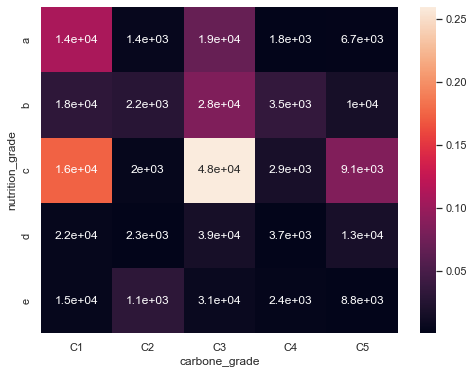

In [218]:
#Table de contingence
X = "nutrition_grade"
Y = "carbone_grade"

cont = data_nett[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(cont)

#Heatmap
plt.figure(figsize=(8,6))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_nett)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [219]:
#Table des p-values
table

carbone_grade          C1        C2        C3        C4        C5  Total
nutrition_grade                                                         
a                0.108667  0.004184  0.068878  0.000889  0.001206    0.0
b                0.031576  0.027832  0.084007  0.035502  0.015631    0.0
c                0.173470  0.003188  0.259249  0.017288  0.085149    0.0
d                0.003906  0.000132  0.016084  0.001098  0.016591    0.0
e                0.003485  0.031014  0.007174  0.003019  0.000781    0.0
Total            0.000000  0.000000  0.000000  0.000000  0.000000    0.0

In [220]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [221]:
#pvalue du test
st_p

0.0

<div class="alert alert-block alert-info"> <b> La pvalue est infèrieure à 0.05. Je rejette H0 et accepte H1 au risque alpha=5% de me tromper. Il existerait un lien entre la catégorie des produits et leur carbonne-grade.
    
En observant la heatmap, je constate que les différences les plus fortes impliques 2 cases, qui peuvent expliquer cette non-indépendance :
- new_grade c pour un carbonne-grade C1
- new_grade c pour un carbonne-grade C3
Ce constat reste néanmoins incohérent car il lie le même niveau de nutri-grade à 2 niveaux différents de carbonne grade.<b/>

## Analyse en composante principale 

In [227]:
print(data_nett.shape)
data_qtt = data_nett.drop(['categories_additives_n', 'ingredients_from_palm_oil_n', 'pnns_groups_1',
                           'nutrition_grade', 'vitamin-a_100g', 'vitamin-c_100g', 'iron_100g', 'calcium_100g',
                           'cholesterol_100g', 'fiber_100g', 'carbone_grade'], axis=1 )
print(data_qtt.shape)

(320638, 23)
(320638, 12)


In [228]:
data_qtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   additives_n              320638 non-null  float64
 1   energy_100g              320638 non-null  float64
 2   fat_100g                 320638 non-null  float64
 3   saturated-fat_100g       320638 non-null  float64
 4   trans-fat_100g           320638 non-null  float64
 5   carbohydrates_100g       320638 non-null  float64
 6   sugars_100g              320638 non-null  float64
 7   proteins_100g            320638 non-null  float64
 8   salt_100g                320638 non-null  float64
 9   sodium_100g              320638 non-null  float64
 10  nutrition_score_fr_100g  320638 non-null  float64
 11  empreinte_carbone        320638 non-null  float64
dtypes: float64(12)
memory usage: 29.4 MB


In [229]:
X = data_qtt.dropna()
keep_ind = X.index
X = StandardScaler().fit_transform(X)

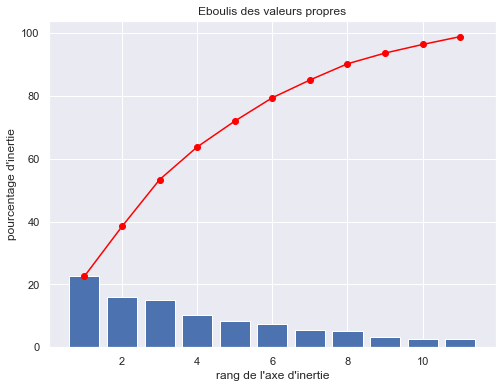

In [230]:
pca = decomposition.PCA(n_components=11)
pca.fit(X)
X = pca.transform(X)

plt.figure(figsize=(8,6))                 
display_scree_plot(pca)

<div class="alert alert-block alert-info">L'éboulis des valeurs propres montrent que les 3 premières composantes principales expliquent plus de 50% de la variabilité.

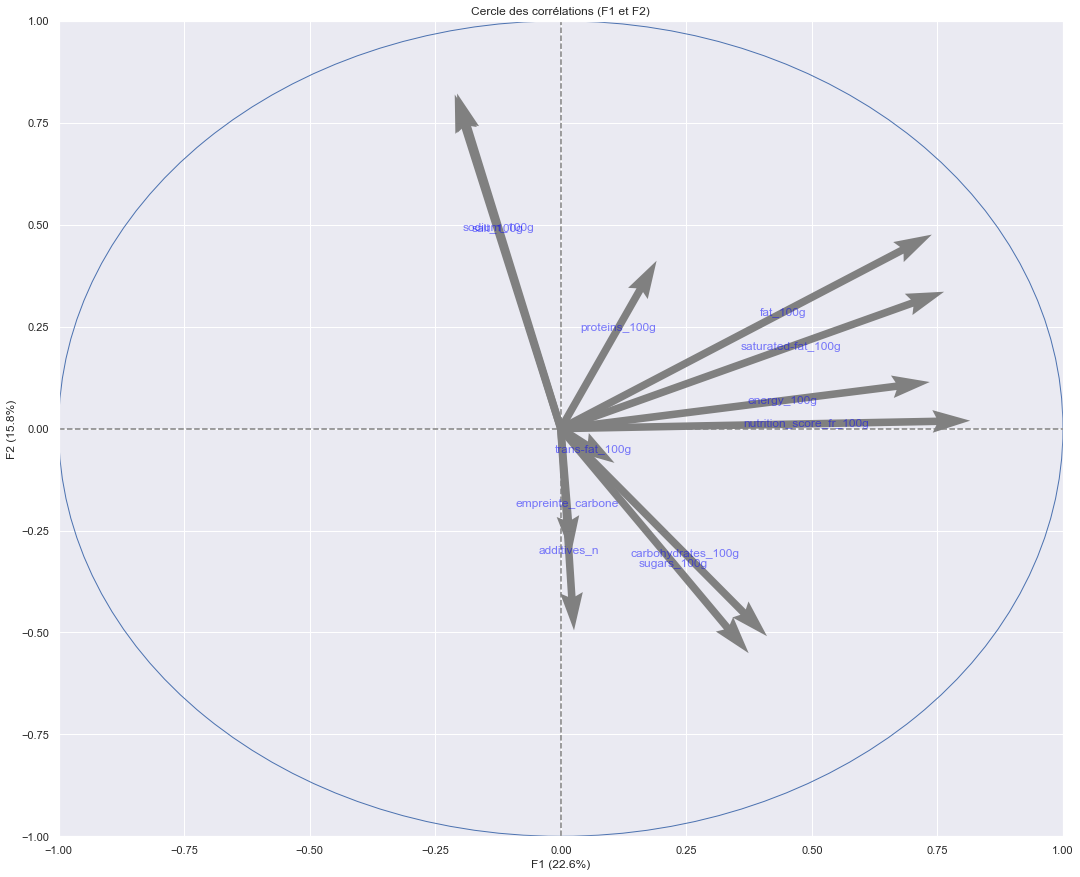

In [231]:
pcs = pca.components_
display_circles(pcs, 3, pca,[(0,1), (2,3), (4,5)], labels = np.array(data_qtt.columns))

<div class="alert alert-block alert-info">L'analyse du cercle de corrélation du premier plan définit par les deux premières composantes F1 et F2, montrent qu'elles représentent respectivement près de 22% et de 16% de l'inertie. Dans ce plan, Les variables les plus corréllées positivement à F1 sont les variables nutritionnelles à forte énergie, l'énergie et le nutri-score. Le sel et le sodium sont elles fortement correllées positivement à F2. Je note que sur ce plan factoriel, l'empreinte carbonne ne se projette pas du tout sur le 1er axe. Le premier axe semble correspondre à tout ce qui est mauvais pour la santé.